In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2,RFE
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

In [2]:
%matplotlib inline

# Import Dataset

In [3]:
df_train_1 = pd.read_csv('dataset/train.csv', low_memory=False)
df_train_1 = pd.DataFrame(df_train_1)
df_test_1 = pd.read_csv('dataset/test.csv', low_memory=False)
df_test_1 = pd.DataFrame(df_test_1)

# Preprocessing Section

In [4]:
# check variable is missing in test
temp_1 = []
for i in df_train_1.columns:
    if i not in df_test_1.columns:
        temp_1.append(i)
if len(temp_1) >= 2:
    print("yes variable is missing : ", temp_1)
else:
    print('all variables are there')
    
        

all variables are there


# CHECK THE NULL VALUES

In [7]:
def issues_null(x):
    arr = []
    df = x.isnull()
    for k in df:
        if k == False:
            arr.append(1)
        elif k == True:
            arr.append(0)
    return arr

In [8]:
df_train_1["issue_0"] = issues_null(df_train_1["issue.0"])
df_test_1["issue_0"] = issues_null(df_test_1["issue.0"])
df_train_1["issue_1"] = issues_null(df_train_1["issue.1"])
df_test_1["issue_1"] = issues_null(df_test_1["issue.1"])
df_train_1["issue_2"] = issues_null(df_train_1["issue.2"])
df_test_1["issue_2"] = issues_null(df_test_1["issue.2"])
df_train_1["issue_3"] = issues_null(df_train_1["issue.3"])
df_test_1["issue_3"] = issues_null(df_test_1["issue.3"])
df_train_1["issue_4"] = issues_null(df_train_1["issue.4"])
df_test_1["issue_4"] = issues_null(df_test_1["issue.4"])
df_train_1["issue_5"] = issues_null(df_train_1["issue.5"])
df_test_1["issue_5"] = issues_null(df_test_1["issue.5"])
df_train_1["issue_6"] = issues_null(df_train_1["issue.6"])
df_test_1["issue_6"] = issues_null(df_test_1["issue.6"])
df_train_1["issue_7"] = issues_null(df_train_1["issue.7"])
df_test_1["issue_7"] = issues_null(df_test_1["issue.7"])
df_train_1["issue_8"] = issues_null(df_train_1["issue.8"])
df_test_1["issue_8"] = issues_null(df_test_1["issue.8"])
df_train_1["issue_9"] = issues_null(df_train_1["issue.9"])
df_test_1["issue_9"] = issues_null(df_test_1["issue.9"])
df_train_1["issue_10"] = issues_null(df_train_1["issue.10"])
df_test_1["issue_10"] = issues_null(df_test_1["issue.10"])
df_train_1["issue_11"] = issues_null(df_train_1["issue.11"])
df_test_1["issue_11"] = issues_null(df_test_1["issue.11"])
df_train_1["issue_12"] = issues_null(df_train_1["issue.12"])
df_test_1["issue_12"] = issues_null(df_test_1["issue.12"])
df_train_1["issue_13"] = issues_null(df_train_1["issue.13"])
df_test_1["issue_13"] = issues_null(df_test_1["issue.13"])
df_train_1["issue_14"] = issues_null(df_train_1["issue.14"])
df_test_1["issue_14"] = issues_null(df_test_1["issue.14"])
df_train_1["issue_15"] = issues_null(df_train_1["issue.15"])
df_test_1["issue_15"] = issues_null(df_test_1["issue.15"])
df_train_1["issue_16"] = issues_null(df_train_1["issue.16"])
df_test_1["issue_16"] = issues_null(df_test_1["issue.16"])
df_train_1["issue_17"] = issues_null(df_train_1["issue.17"])
df_test_1["issue_17"] = issues_null(df_test_1["issue.17"])
df_train_1["issue_18"] = issues_null(df_train_1["issue.18"])
df_test_1["issue_18"] = issues_null(df_test_1["issue.18"])
df_train_1["issue_19"] = issues_null(df_train_1["issue.19"])
df_test_1["issue_19"] = issues_null(df_test_1["issue.19"])
df_train_1["issue_20"] = issues_null(df_train_1["issue.20"])
df_test_1["issue_20"] = issues_null(df_test_1["issue.20"])

# FEATURE ENGINEERING REGARDING ISSUES COLUMNS

In [9]:
df_train_1["No_of_issues"] = df_train_1["issue_0"]+df_train_1["issue_1"]+df_train_1["issue_2"]+df_train_1["issue_5"]+df_train_1["issue_4"]+df_train_1["issue_5"]+df_train_1["issue_6"]+df_train_1["issue_7"]+df_train_1["issue_8"]+df_train_1["issue_9"]+df_train_1["issue_10"]+df_train_1["issue_11"]+df_train_1["issue_12"]+df_train_1["issue_13"]+df_train_1["issue_14"]+df_train_1["issue_15"]+df_train_1["issue_16"]+df_train_1["issue_17"]+df_train_1["issue_18"]+df_train_1["issue_19"]+df_train_1["issue_20"]

In [10]:
df_test_1["No_of_issues"] = df_test_1["issue_0"]+df_test_1["issue_1"]+df_test_1["issue_2"]+df_test_1["issue_5"]+df_test_1["issue_4"]+df_test_1["issue_5"]+df_test_1["issue_6"]+df_test_1["issue_7"]+df_test_1["issue_8"]+df_test_1["issue_9"]+df_test_1["issue_10"]+df_train_1["issue_11"]+df_test_1["issue_12"]+df_test_1["issue_13"]+df_test_1["issue_14"]+df_test_1["issue_15"]+df_test_1["issue_16"]+df_test_1["issue_17"]+df_test_1["issue_18"]+df_test_1["issue_19"]+df_test_1["issue_20"]

In [11]:
df_train_1["No_of_issues"].value_counts()


0     6627
1     1066
2      547
3      429
4       88
6       45
7       23
8       22
9        6
11       4
10       4
13       3
16       3
15       3
21       2
12       2
14       2
18       1
17       1
Name: No_of_issues, dtype: int64

In [12]:
df_test_1["No_of_issues"].value_counts()

0.0     3522
1.0      566
2.0      314
3.0      252
4.0       38
6.0       28
8.0       16
7.0        9
9.0        5
11.0       3
10.0       2
20.0       2
12.0       1
16.0       1
15.0       1
Name: No_of_issues, dtype: int64

In [13]:
df_test_1["No_of_issues"] = df_test_1["No_of_issues"].astype('int')

# HANDLE IMBALANCE OF THE DATASET

In [14]:
df_train_1['importance'].value_counts()

4    5774
3    2011
1     582
2     511
Name: importance, dtype: int64

In [15]:
temp_df_1 =df_train_1[df_train_1['importance']==3]
temp_df_2 =df_train_1[df_train_1['importance']==3]
temp_df_3 =df_train_1[df_train_1['importance']==3]

temp_list_1 = [temp_df_1,temp_df_2,temp_df_3]

conc_temp = pd.concat(temp_list_1)

temp_list_2 = conc_temp[0:3763]

final_list_1 = [df_train_1, temp_list_2]

df_train_1 = pd.concat(final_list_1)

len(df_train_1)

12641

In [16]:
temp_df_1 =df_train_1[df_train_1['importance']==1]
temp_df_2 =df_train_1[df_train_1['importance']==1]
temp_df_3 =df_train_1[df_train_1['importance']==1]

temp_list_1 = [temp_df_1,temp_df_2,temp_df_3,temp_df_1,temp_df_2,temp_df_3,temp_df_1,temp_df_2,temp_df_3,temp_df_2]

conc_temp = pd.concat(temp_list_1)

temp_list_2 = conc_temp[0:5192]

final_list_1 = [df_train_1, temp_list_2]

df_train_1 = pd.concat(final_list_1)

len(df_train_1)

17833

In [17]:
temp_df_1 =df_train_1[df_train_1['importance']==2]
temp_df_2 =df_train_1[df_train_1['importance']==2]
temp_df_3 =df_train_1[df_train_1['importance']==2]

temp_list_1 = [temp_df_1,temp_df_2,temp_df_3,temp_df_1,temp_df_2,temp_df_3,temp_df_1,temp_df_2,temp_df_3,temp_df_2,temp_df_1]

conc_temp = pd.concat(temp_list_1)

temp_list_2 = conc_temp[0:5263]

final_list_1 = [df_train_1, temp_list_2]

df_train_1 = pd.concat(final_list_1)

len(df_train_1)

23096

In [18]:
df_train_1['importance'].value_counts()

4    5774
3    5774
2    5774
1    5774
Name: importance, dtype: int64

In [19]:
temp_df_f1 =df_train_1[df_train_1['importance']==1]
temp_df_f2 =df_train_1[df_train_1['importance']==2]
temp_df_f3 =df_train_1[df_train_1['importance']==3]
temp_df_f4 =df_train_1[df_train_1['importance']==4]

temp_df_f1 = temp_df_f1[0:3000]
temp_df_f2 = temp_df_f2[0:3000]
temp_df_f3 = temp_df_f3[0:3000]
temp_df_f4 = temp_df_f4[0:3000]

temp_list_1 = [temp_df_f1,temp_df_f2,temp_df_f3,temp_df_f4]

df_train_1 = pd.concat(temp_list_1)

len(df_train_1)

12000

# Visualizing New Feature 

Text(0.5, 1.0, 'issues effect on importance')

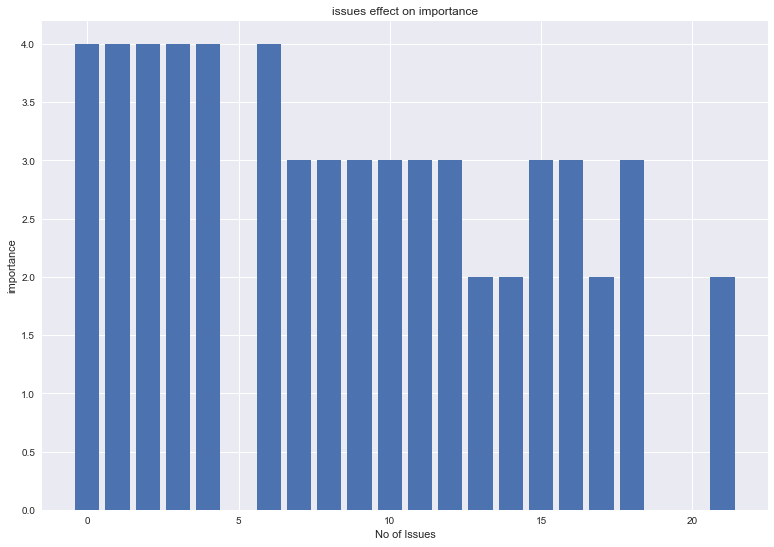

In [20]:
plt.style.use('seaborn')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13,9) )
ax.bar(df_train_1['No_of_issues'], df_train_1['importance'])
ax.set_xlabel('No of Issues')
ax.set_ylabel('importance')
ax.set_title('issues effect on importance')

Text(0.5, 1.0, 'issues')

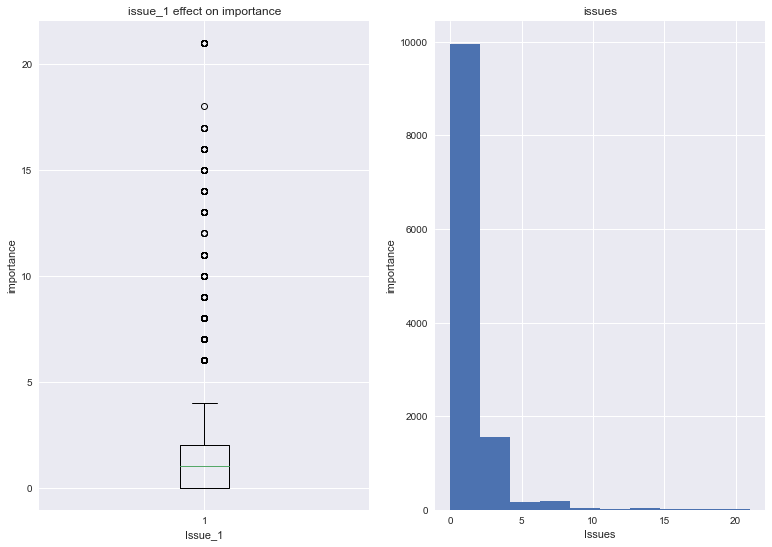

In [21]:
plt.style.use('seaborn')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13,9))
ax[0].boxplot(df_train_1['No_of_issues'])
ax[0].set_xlabel('Issue_1')
ax[0].set_ylabel('importance')
ax[0].set_title('issue_1 effect on importance')

ax[1].hist(df_train_1['No_of_issues'])
ax[1].set_xlabel('Issues')
ax[1].set_ylabel('importance')
ax[1].set_title('issues')

we can divide no of issues into two groups one is less than or equal to 6 and other is more than 6

Text(0.5, 1.0, 'issue_1 effect on importance')

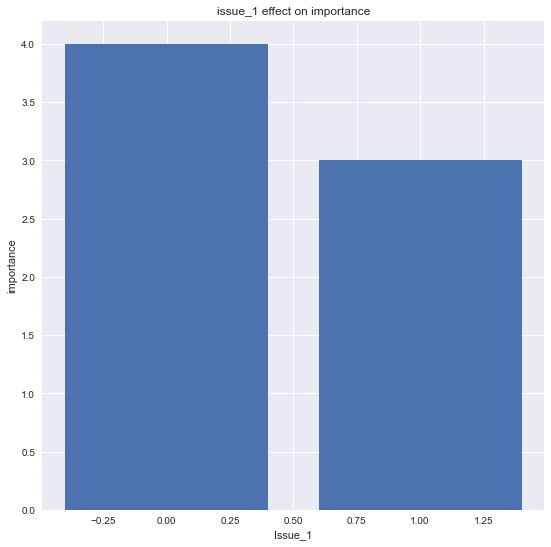

In [22]:
temp_2 = []
for i in df_train_1['No_of_issues']:
    if i <= 6:
        # if issues are less or equal to six
        temp_2.append(0)
    else:
        # if issues are more than six
        temp_2.append(1)

df_train_1['issues_group'] = temp_2

plt.style.use('seaborn')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,9))
ax.bar(temp_2 , df_train_1['importance'])
ax.set_xlabel('Issue_1')
ax.set_ylabel('importance')
ax.set_title('issue_1 effect on importance')

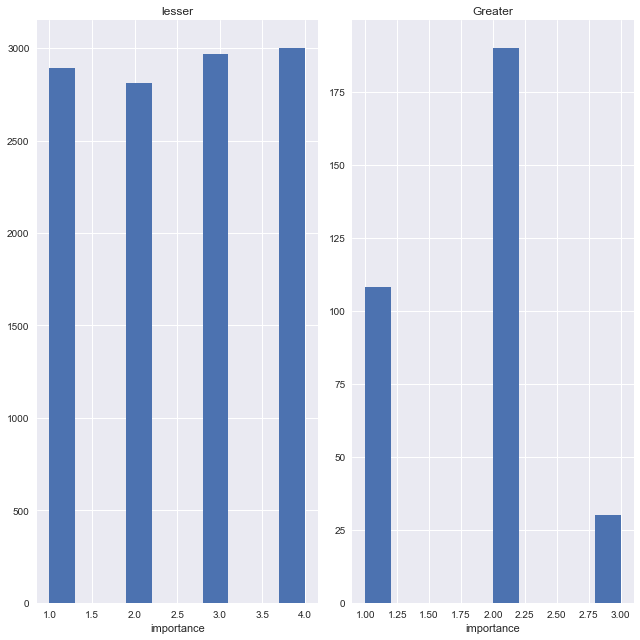

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9,9))
ax[0].hist(df_train_1[df_train_1['issues_group']==0]['importance'])
ax[0].set_xlabel('importance')
ax[0].set_title('lesser')

ax[1].hist(df_train_1[df_train_1['issues_group']==1]['importance'])
ax[1].set_xlabel('importance')
ax[1].set_title('Greater')


plt.tight_layout()

In [24]:
temp_3 = []
for i in df_test_1['No_of_issues']:
    if i <= 6:
        # if issues are less or equal to six
        temp_3.append(0)
    else:
        # if issues are more than six
        temp_3.append(1)

df_test_1['issues_group'] = temp_3

# Second variable is country

In [25]:
df_train_1['country.name'].value_counts()

Russian Federation        1522
Turkey                    1075
United Kingdom             979
Ukraine                    729
France                     705
Poland                     591
Italy                      450
Austria                    433
Germany                    421
Bulgaria                   391
Romania                    371
Croatia                    347
Hungary                    341
Netherlands                292
Switzerland                255
Moldova, Republic of       223
Greece                     213
Belgium                    201
Slovakia                   193
Finland                    178
Slovenia                   161
Sweden                     146
Lithuania                  130
Spain                      125
Azerbaijan                 122
North Macedonia            119
Malta                      118
Latvia                     112
Norway                     107
Portugal                   105
Serbia                     102
Armenia                    101
Georgia 

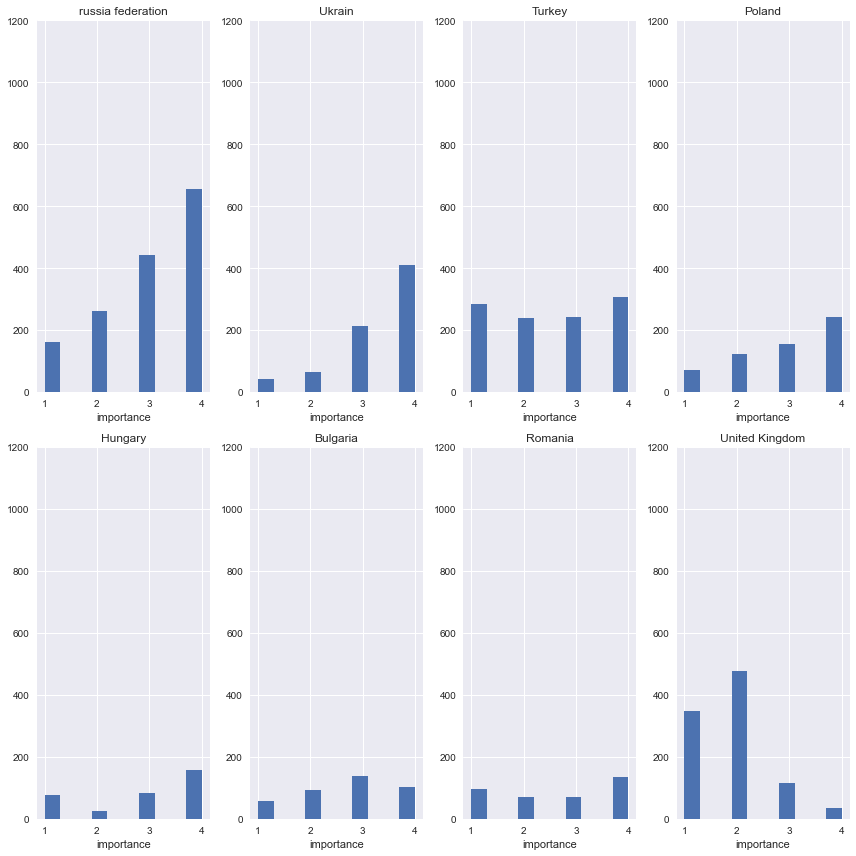

In [26]:
fig, ax = plt.subplots(nrows= 2, ncols=4, figsize=(12,12))
ax[0][0].hist(df_train_1[df_train_1['country.name']=='Russian Federation']['importance'])
ax[0][0].set_xlabel('importance')
ax[0][0].set_ylim(0,1200)
ax[0][0].set_title('russia federation')

ax[0][1].hist(df_train_1[df_train_1['country.name']=='Ukraine']['importance'])
ax[0][1].set_xlabel('importance')
ax[0][1].set_ylim(0,1200)
ax[0][1].set_title('Ukrain')

ax[0][2].hist(df_train_1[df_train_1['country.name']=='Turkey']['importance'])
ax[0][2].set_xlabel('importance')
ax[0][2].set_ylim(0,1200)
ax[0][2].set_title('Turkey')

ax[0][3].hist(df_train_1[df_train_1['country.name']=='Poland']['importance'])
ax[0][3].set_xlabel('importance')
ax[0][3].set_ylim(0,1200)
ax[0][3].set_title('Poland')

ax[1][0].hist(df_train_1[df_train_1['country.name']=='Hungary']['importance'])
ax[1][0].set_xlabel('importance')
ax[1][0].set_ylim(0,1200)
ax[1][0].set_title('Hungary')

ax[1][1].hist(df_train_1[df_train_1['country.name']=='Bulgaria']['importance'])
ax[1][1].set_xlabel('importance')
ax[1][1].set_ylim(0,1200)
ax[1][1].set_title('Bulgaria')

ax[1][2].hist(df_train_1[df_train_1['country.name']=='Romania']['importance'])
ax[1][2].set_xlabel('importance')
ax[1][2].set_ylim(0,1200)
ax[1][2].set_title('Romania')

ax[1][3].hist(df_train_1[df_train_1['country.name']=='United Kingdom']['importance'])
ax[1][3].set_xlabel('importance')
ax[1][3].set_ylim(0,1200)
ax[1][3].set_title('United Kingdom')

plt.tight_layout()

drop the country variable because of if we include this feature so it will be cause of biasness.

# doctypebranch

In [27]:
df_train_1['doctypebranch'].value_counts()

CHAMBER         9692
GRANDCHAMBER    1393
COMMITTEE        915
Name: doctypebranch, dtype: int64

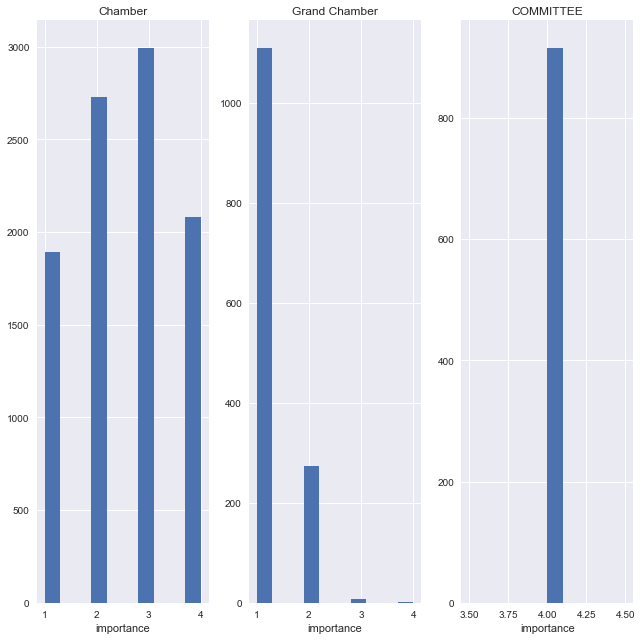

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,9))
ax[0].hist(df_train_1[df_train_1['doctypebranch']=='CHAMBER']['importance'])
ax[0].set_xlabel('importance')
ax[0].set_title('Chamber')

ax[1].hist(df_train_1[df_train_1['doctypebranch']=='GRANDCHAMBER']['importance'])
ax[1].set_xlabel('importance')
ax[1].set_title('Grand Chamber')

ax[2].hist(df_train_1[df_train_1['doctypebranch']=='COMMITTEE']['importance'])
ax[2].set_xlabel('importance')
ax[2].set_title('COMMITTEE')

plt.tight_layout()

In [29]:
doctypebranch = {'CHAMBER':1,'GRANDCHAMBER':2,'COMMITTEE':3}
df_train_1['doctypebranch'] = df_train_1['doctypebranch'].map(doctypebranch)
df_test_1['doctypebranch'] = df_test_1['doctypebranch'].map(doctypebranch)

In [30]:
df_train_1.reset_index(drop=True, inplace=True)

In [31]:
df_train_1['doctypebranch']

0        1
1        1
2        2
3        1
4        1
        ..
11995    1
11996    1
11997    1
11998    1
11999    3
Name: doctypebranch, Length: 12000, dtype: int64

# originatingbody

In [32]:
df_train_1['originatingbody'].isnull().sum()

0

In [33]:
df_train_1['originatingbody'].value_counts()

4     2242
7     1901
5     1647
8     1393
6     1344
23    1145
9     1081
15     332
27     293
29     215
28     195
26     122
25      90
Name: originatingbody, dtype: int64

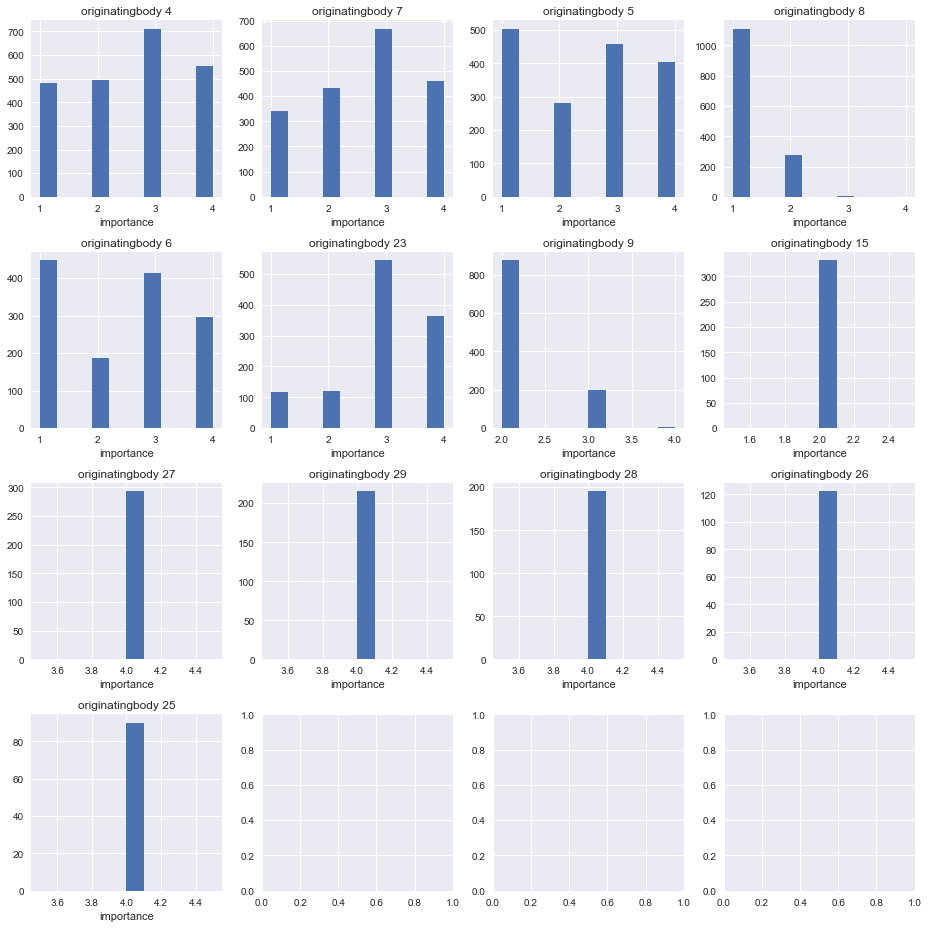

In [34]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(13,13))
ax[0][0].hist(df_train_1[df_train_1['originatingbody']==4]['importance'])
ax[0][0].set_xlabel('importance')
ax[0][0].set_title('originatingbody 4')

ax[0][1].hist(df_train_1[df_train_1['originatingbody']==7]['importance'])
ax[0][1].set_xlabel('importance')
ax[0][1].set_title('originatingbody 7')

ax[0][2].hist(df_train_1[df_train_1['originatingbody']==5]['importance'])
ax[0][2].set_xlabel('importance')
ax[0][2].set_title('originatingbody 5')

ax[0][3].hist(df_train_1[df_train_1['originatingbody']==8]['importance'])
ax[0][3].set_xlabel('importance')
ax[0][3].set_title('originatingbody 8')


ax[1][0].hist(df_train_1[df_train_1['originatingbody']==6]['importance'])
ax[1][0].set_xlabel('importance')
ax[1][0].set_title('originatingbody 6')


ax[1][1].hist(df_train_1[df_train_1['originatingbody']==23]['importance'])
ax[1][1].set_xlabel('importance')
ax[1][1].set_title('originatingbody 23')


ax[1][2].hist(df_train_1[df_train_1['originatingbody']==9]['importance'])
ax[1][2].set_xlabel('importance')
ax[1][2].set_title('originatingbody 9')

ax[1][3].hist(df_train_1[df_train_1['originatingbody']==15]['importance'])
ax[1][3].set_xlabel('importance')
ax[1][3].set_title('originatingbody 15')

ax[2][0].hist(df_train_1[df_train_1['originatingbody']==27]['importance'])
ax[2][0].set_xlabel('importance')
ax[2][0].set_title('originatingbody 27')


ax[2][1].hist(df_train_1[df_train_1['originatingbody']==29]['importance'])
ax[2][1].set_xlabel('importance')
ax[2][1].set_title('originatingbody 29')


ax[2][2].hist(df_train_1[df_train_1['originatingbody']==28]['importance'])
ax[2][2].set_xlabel('importance')
ax[2][2].set_title('originatingbody 28')

ax[2][3].hist(df_train_1[df_train_1['originatingbody']==26]['importance'])
ax[2][3].set_xlabel('importance')
ax[2][3].set_title('originatingbody 26')


ax[3][0].hist(df_train_1[df_train_1['originatingbody']==25]['importance'])
ax[3][0].set_xlabel('importance')
ax[3][0].set_title('originatingbody 25')

plt.tight_layout()

# Rank

In [35]:
df_train_1['rank'].describe()

count    12000.000000
mean      1047.407007
std       1216.404008
min        171.353943
25%        466.212143
50%        643.008423
75%       1053.839966
max       9968.310547
Name: rank, dtype: float64

(array([1.363e+03, 3.280e+03, 2.659e+03, 1.367e+03, 6.400e+02, 4.590e+02,
        3.170e+02, 2.970e+02, 2.810e+02, 1.580e+02, 1.630e+02, 1.140e+02,
        8.300e+01, 8.700e+01, 1.170e+02, 6.100e+01, 5.200e+01, 2.400e+01,
        6.300e+01, 1.300e+01, 2.100e+01, 4.100e+01, 3.300e+01, 1.500e+01,
        9.000e+00, 3.600e+01, 2.500e+01, 1.400e+01, 2.000e+01, 4.000e+00,
        5.000e+00, 1.000e+01, 1.000e+01, 2.800e+01, 1.000e+01, 2.300e+01,
        7.000e+00, 1.400e+01, 7.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        6.000e+00, 2.000e+00, 4.000e+00, 2.000e+00, 1.700e+01, 1.000e+01,
        1.700e+01, 1.200e+01]),
 array([ 171.35394287,  367.29307495,  563.23220703,  759.17133911,
         955.11047119, 1151.04960327, 1346.98873535, 1542.92786743,
        1738.86699951, 1934.80613159, 2130.74526367, 2326.68439575,
        2522.62352783, 2718.56265991, 2914.50179199, 3110.44092407,
        3306.38005615, 3502.31918823, 3698.25832031, 3894.19745239,
        4090.13658447, 4286.07571655

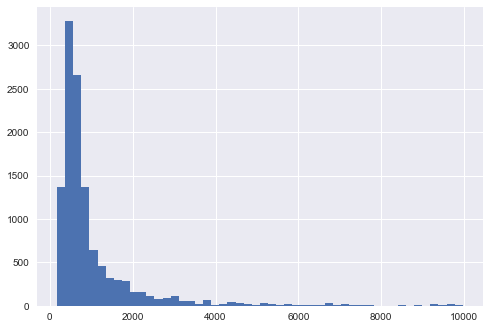

In [36]:
plt.hist(df_train_1['rank'], bins=50)

{'whiskers': [<matplotlib.lines.Line2D at 0x2788caf2550>,
 'caps': [<matplotlib.lines.Line2D at 0x2788caf2b00>,
 'boxes': [<matplotlib.lines.Line2D at 0x2788caf24a8>],
 'medians': [<matplotlib.lines.Line2D at 0x2788cafa0f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2788cafa3c8>],
 'means': []}

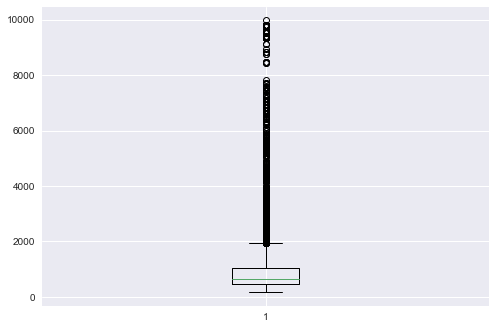

In [37]:
plt.boxplot(df_train_1['rank'])

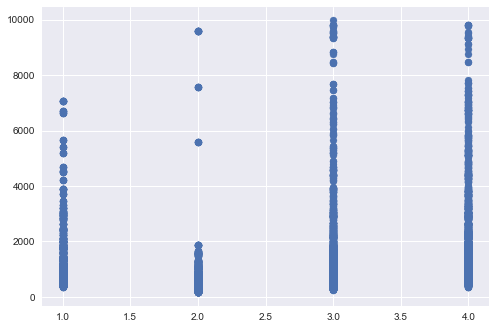

In [38]:
plt.scatter(df_train_1['importance'],df_train_1['rank'] )

In [39]:
df_train_1[df_train_1['importance']==1]['rank'].describe()

count    3000.000000
mean      873.915396
std       918.328049
min       342.927734
25%       435.335663
50%       530.528381
75%       830.023560
max      7078.854004
Name: rank, dtype: float64

In [40]:
df_train_1[df_train_1['importance']==2]['rank'].describe()

count    3000.000000
mean      586.922479
std       728.472479
min       171.353943
25%       308.290558
50%       493.762451
75%       668.650452
max      9601.976562
Name: rank, dtype: float64

In [41]:
df_train_1[df_train_1['importance']==3]['rank'].describe()

count    3000.000000
mean     1207.510812
std      1336.871458
min       256.426727
25%       582.346497
50%       794.927795
75%      1268.226898
max      9968.310547
Name: rank, dtype: float64

In [42]:
df_train_1[df_train_1['importance']==4]['rank'].describe()

count    3000.000000
mean     1521.279343
std      1505.427977
min       357.232697
25%       622.558350
50%       869.752014
75%      1829.745789
max      9819.024414
Name: rank, dtype: float64

(array([1179.,  738.,  236.,  143.,   84.,   80.,   60.,   56.,   47.,
          30.,   56.,   26.,   42.,   15.,   16.,   26.,   11.,    5.,
          16.,   31.,   10.,   10.,    5.,    5.,    0.,    6.,   11.,
           0.,    5.,    0.,    5.,    5.,    5.,    0.,    0.,    5.,
           0.,    5.,    0.,    5.,    0.,    0.,    0.,    0.,    0.,
           0.,    5.,    6.,    0.,   10.]),
 array([ 342.92773438,  477.64625977,  612.36478516,  747.08331055,
         881.80183594, 1016.52036133, 1151.23888672, 1285.95741211,
        1420.6759375 , 1555.39446289, 1690.11298828, 1824.83151367,
        1959.55003906, 2094.26856445, 2228.98708984, 2363.70561523,
        2498.42414062, 2633.14266602, 2767.86119141, 2902.5797168 ,
        3037.29824219, 3172.01676758, 3306.73529297, 3441.45381836,
        3576.17234375, 3710.89086914, 3845.60939453, 3980.32791992,
        4115.04644531, 4249.7649707 , 4384.48349609, 4519.20202148,
        4653.92054687, 4788.63907227, 4923.35759766, 505

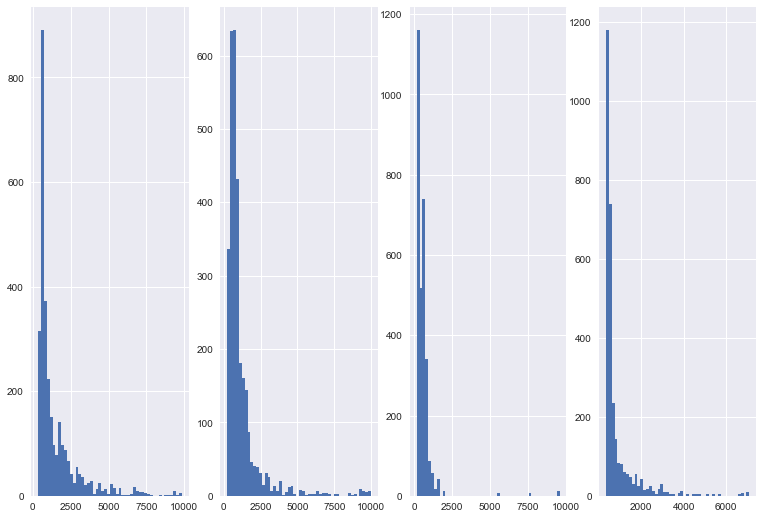

In [43]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(13,9))

ax[0].hist(df_train_1[df_train_1['importance']==4]['rank'], bins=50)

ax[1].hist(df_train_1[df_train_1['importance']==3]['rank'], bins=50)

ax[2].hist(df_train_1[df_train_1['importance']==2]['rank'], bins=50)

ax[3].hist(df_train_1[df_train_1['importance']==1]['rank'], bins=50)

keep rank feature in dataset it is not clear that it has relation with target variable, we will see it in feature selection chi square test.

# separateopinion

In [44]:
df_train_1['separateopinion'].value_counts()

False    7702
True     4298
Name: separateopinion, dtype: int64

In [45]:
boolean = {False : 0, True: 1}
df_train_1['separateopinion'] = df_train_1['separateopinion'].map(boolean)

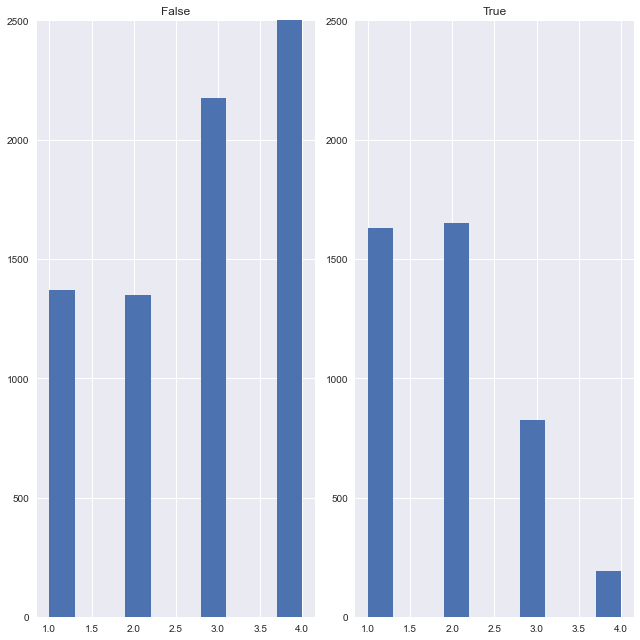

In [46]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9,9))
ax[0].hist(df_train_1[df_train_1['separateopinion']==0]['importance'])
ax[0].set_title('False')
ax[0].set_ylim(0, 2500)

ax[1].hist(df_train_1[df_train_1['separateopinion']==1]['importance'])
ax[1].set_title('True')
ax[1].set_ylim(0, 2500)

plt.tight_layout()

In [47]:
boolean = {False : 0, True: 1}
df_test_1['separateopinion'] = df_test_1['separateopinion'].map(boolean)

# typedescription

In [48]:
df_train_1['typedescription'].value_counts()

15    10598
14     1320
12       72
19        5
18        5
Name: typedescription, dtype: int64

In [49]:
df_train_1['typedescription'].isnull().sum()

0

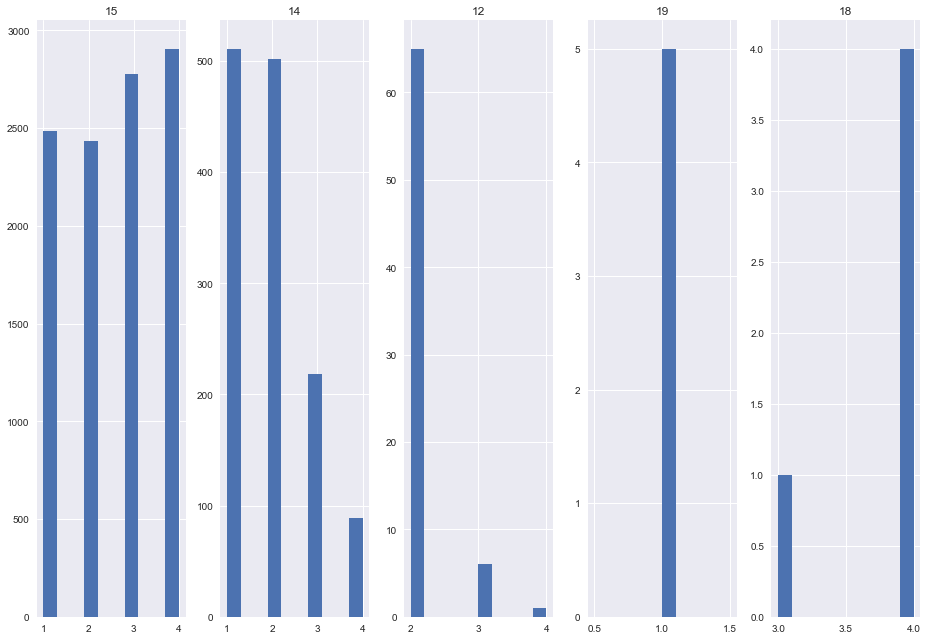

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(13,9))
ax[0].hist(df_train_1[df_train_1['typedescription']==15]['importance'])
ax[0].set_title('15')

ax[1].hist(df_train_1[df_train_1['typedescription']==14]['importance'])
ax[1].set_title('14')

ax[2].hist(df_train_1[df_train_1['typedescription']==12]['importance'])
ax[2].set_title('12')

ax[3].hist(df_train_1[df_train_1['typedescription']==19]['importance'])
ax[3].set_title('19')

ax[4].hist(df_train_1[df_train_1['typedescription']==18]['importance'])
ax[4].set_title('18')

plt.tight_layout()

In [51]:
df_train_1.columns[300:350]

Index(['paragraphs=P6-2', 'paragraphs=46-4', 'ccl_article=1', 'ccl_article=10',
       'ccl_article=11', 'ccl_article=12', 'ccl_article=13', 'ccl_article=14',
       'ccl_article=17', 'ccl_article=18', 'ccl_article=2', 'ccl_article=25',
       'ccl_article=3', 'ccl_article=34', 'ccl_article=38', 'ccl_article=4',
       'ccl_article=46', 'ccl_article=5', 'ccl_article=6', 'ccl_article=7',
       'ccl_article=8', 'ccl_article=9', 'ccl_article=p1', 'ccl_article=p12',
       'ccl_article=p4', 'ccl_article=p6', 'ccl_article=p7', 'importance',
       'issue_0', 'issue_1', 'issue_2', 'issue_3', 'issue_4', 'issue_5',
       'issue_6', 'issue_7', 'issue_8', 'issue_9', 'issue_10', 'issue_11',
       'issue_12', 'issue_13', 'issue_14', 'issue_15', 'issue_16', 'issue_17',
       'issue_18', 'issue_19', 'issue_20', 'No_of_issues'],
      dtype='object')

# Parties

In [52]:
df_train_1['parties.0'].value_counts()

SAADI                                                                              16
A.                                                                                 16
H.                                                                                 15
A AND B                                                                            12
HIRST                                                                              12
                                                                                   ..
FARRUGIA                                                                            1
ALKOVIĆ                                                                             1
NEKVEDAVIČIUS                                                                       1
VITRUK                                                                              1
S.C. CARBOCHIM S.A. CLUJ-NAPOCA AND S.C. FENEGA IMPORT-EXPORT S.R.L. AND OTHERS     1
Name: parties.0, Length: 5806, dtype: int64

# Start feature selection Process

In [53]:
sel_data = ['issue_0', 'issue_1', 'issue_2', 'issue_3', 'issue_4', 'issue_5', 
                                  'issue_6', 'issue_7', 'issue_8', 'issue_9', 'issue_10', 'issue_11', 
                                  'issue_12', 'issue_13', 'issue_14', 'issue_15', 'issue_16', 'issue_17',
                                  'issue_18', 'issue_19', 'issue_20', 'No_of_issues', 'issues_group', 'doctypebranch','respondentOrderEng',
                                 'originatingbody', 'rank', 'separateopinion', 'typedescription','article=3','article=6',
                                  'article=P1','article=5','article=8','article=13','article=10','article=2','article=34',
                                  'article=41','article=38','article=35','article=4','article=29','article=14','article=P12',
                                  'article=9','article=1','article=11','article=46','article=P4','article=17','article=18',
                                  'article=7','article=','article=37','article=P7','article=57','article=26','article=27',
                                  'article=36','article=30','article=12','article=56','article=39','article=15','article=25',
                                  'article=P6','article=19','article=32','article=33','article=53','article=28','article=43',
                                  'article=52','article=P13','article=16','documentcollectionid=CASELAW',
                                  'documentcollectionid=JUDGMENTS','documentcollectionid=CHAMBER','documentcollectionid=ENG',
                                  'documentcollectionid=COMMITTEE','documentcollectionid=GRANDCHAMBER','applicability=',
                                  'applicability=36','applicability=43','applicability=41','applicability=55','applicability=3',
                                  'applicability=22','applicability=60','applicability=58','applicability=25','applicability=47',
                                  'applicability=12','applicability=38','applicability=20','applicability=18','applicability=24',
                                  'applicability=62', 'applicability=21', 'applicability=23', 'applicability=8', 'applicability=26',
                                  'applicability=53', 'applicability=15', 'applicability=48','applicability=14','applicability=51',
                                  'applicability=13', 'applicability=5', 'applicability=7', 'applicability=50', 'applicability=52',
                                  'applicability=28', 'applicability=29','applicability=31', 'applicability=6','applicability=81',
                                  'applicability=66', 'applicability=49','applicability=33','applicability=63','applicability=68',
                                  'applicability=46', 'applicability=19','applicability=40','applicability=17','applicability=32',
                                  'applicability=72','applicability=34','applicability=35','applicability=54','applicability=27',
                                  'applicability=16','applicability=64','applicability=57','applicability=56','applicability=2',
                                  'applicability=4','applicability=67','applicability=77','applicability=71','applicability=59',
                                  'paragraphs=3','paragraphs=6','paragraphs=6-1','paragraphs=6-3-c','paragraphs=P1-3','paragraphs=5',
                                  'paragraphs=5-1','paragraphs=P1-1','paragraphs=8','paragraphs=8-1','paragraphs=13','paragraphs=10',
                                  'paragraphs=10-2','paragraphs=10-1','paragraphs=35-1','paragraphs=2','paragraphs=2-1',
                                  'paragraphs=34', 'paragraphs=41', 'paragraphs=38', 'paragraphs=35', 'paragraphs=8-2', 
                                  'paragraphs=35-3-a', 'paragraphs=29-3', 'paragraphs=4', 'paragraphs=29', 'paragraphs=P1-1-1',
                                  'paragraphs=5-1-e', 'paragraphs=6-2', 'paragraphs=5-1-c', 'paragraphs=14', 'paragraphs=35-3',
                                  'paragraphs=6-3-d', 'paragraphs=5-1-b', 'paragraphs=5-5', 'paragraphs=P12-1', 'paragraphs=11-1',
                                  'paragraphs=11-2','paragraphs=9', 'paragraphs=9-1', 'paragraphs=1', 'paragraphs=11', 
                                  'paragraphs=6-3', 'paragraphs=5-3','paragraphs=5-4', 'paragraphs=46', 'paragraphs=46-2',
                                  'paragraphs=5-1-a', 'paragraphs=P4-2', 'paragraphs=P4-2-2',
                                  'paragraphs=17', 'paragraphs=18', 'paragraphs=7', 'paragraphs=7-1',
                                  'paragraphs=', 'paragraphs=4-3-d', 'paragraphs=4-2', 'paragraphs=6-3-e',
                                  'paragraphs=9-2', 'paragraphs=P1-1-2', 'paragraphs=P4-2-1',
                                  'paragraphs=37-1-c', 'paragraphs=37', 'paragraphs=P7-4',
                                  'paragraphs=4-1', 'paragraphs=57', 'paragraphs=6-3-b',
                                  'paragraphs=35-3-b', 'paragraphs=5-1-f', 'paragraphs=35-4',
                                  'paragraphs=P4-2-3', 'paragraphs=2-2', 'paragraphs=26',
                                  'paragraphs=27-2', 'paragraphs=27', 'paragraphs=36', 'paragraphs=36-1',
                                  'paragraphs=37-1', 'paragraphs=P7-2', 'paragraphs=35-2',
                                  'paragraphs=5-1-d', 'paragraphs=6-3-a', 'paragraphs=30',
                                  'paragraphs=46-1', 'paragraphs=12', 'paragraphs=P7-1',
                                  'paragraphs=P7-1-1', 'paragraphs=36-2', 'paragraphs=5-2',
                                  'paragraphs=P1-2', 'paragraphs=P1-4', 'paragraphs=56-3',
                                  'paragraphs=56', 'paragraphs=56-1', 'paragraphs=P7-1-2',
                                  'paragraphs=38-1-a', 'paragraphs=37-1-b', 'paragraphs=39',
                                  'paragraphs=15-1', 'paragraphs=15', 'paragraphs=7-2', 'paragraphs=P4-4',
                                  'paragraphs=15-3', 'paragraphs=25-1', 'paragraphs=25',
                                  'paragraphs=37-1-a', 'paragraphs=P6-1', 'paragraphs=P7-5',
                                  'paragraphs=19', 'paragraphs=32', 'paragraphs=P7-3', 'paragraphs=33',
                                  'paragraphs=28-1-a', 'paragraphs=53', 'paragraphs=28',
                                  'paragraphs=35-2-b', 'paragraphs=43', 'paragraphs=4-3-b',
                                  'paragraphs=4-3-a', 'paragraphs=4-3', 'paragraphs=28-3',
                                  'paragraphs=52', 'paragraphs=P13-1', 'paragraphs=P7-4-1',
                                  'paragraphs=16', 'paragraphs=P4-3', 'paragraphs=27-1-b',
                                  'paragraphs=29-1', 'paragraphs=32-2', 'paragraphs=28-1',
                                  'paragraphs=P6-2', 'paragraphs=46-4', 'ccl_article=1', 'ccl_article=10','ccl_article=11', 
                                  'ccl_article=12', 'ccl_article=13', 'ccl_article=14',
                                  'ccl_article=17', 'ccl_article=18', 'ccl_article=2', 'ccl_article=25',
                                  'ccl_article=3', 'ccl_article=34', 'ccl_article=38', 'ccl_article=4',
                                  'ccl_article=46', 'ccl_article=5', 'ccl_article=6', 'ccl_article=7',
                                  'ccl_article=8', 'ccl_article=9', 'ccl_article=p1', 'ccl_article=p12',
                                  'ccl_article=p4', 'ccl_article=p6', 'ccl_article=p7']

feature_sel_data = {}
for feature in sel_data:
    feature_sel_data[feature] = df_train_1[feature]

In [54]:
feature_sel_data = pd.DataFrame(feature_sel_data)


In [55]:
feature_sel_label = df_train_1['importance'] 

In [56]:
foo_2 = ['ccl_article=1', 'ccl_article=10', 'ccl_article=11', 'ccl_article=12', 'ccl_article=13', 'ccl_article=14', 
         'ccl_article=2', 'ccl_article=25', 'ccl_article=3', 'ccl_article=34', 'ccl_article=38', 'ccl_article=4', 'ccl_article=5', 
         'ccl_article=6', 'ccl_article=7', 'ccl_article=8', 'ccl_article=9', 'ccl_article=p1', 'ccl_article=p4', 'ccl_article=p7',
        'ccl_article=17','ccl_article=18']

for i in foo_2:
    null = []
    for j in feature_sel_data[i]:
        if j == -1:
            null.append(2)
        else:
            null.append(j)
    feature_sel_data[i] = null
    


In [57]:
foo_4 = ['article=P1','article=5','article=8','article=13','article=10','article=2','article=34',
                                  'article=41','article=38','article=35','article=4','article=29','article=14','article=P12',
                                  'article=9','article=1','article=11','article=46','article=P4','article=17','article=18',
                                  'article=7','article=','article=37','article=P7','article=57','article=26','article=27',
                                  'article=36','article=30','article=12','article=56','article=39','article=15','article=25',
                                  'article=P6','article=19','article=32','article=33','article=53','article=28','article=43',
                                  'article=52','article=P13','article=16','applicability=',
                                  'applicability=36','applicability=43','applicability=41','applicability=55','applicability=3',
                                  'applicability=22','applicability=60','applicability=58','applicability=25','applicability=47',
                                  'applicability=12','applicability=38','applicability=20','applicability=18','applicability=24',
                                  'applicability=62', 'applicability=21', 'applicability=23', 'applicability=8', 'applicability=26',
                                  'applicability=53', 'applicability=15', 'applicability=48','applicability=14',
                                  'applicability=13', 'applicability=5', 'applicability=50', 'applicability=52','applicability=6',
                                  'applicability=81',
                                  'applicability=66', 'applicability=49','applicability=33','applicability=63','applicability=68',
                                  'applicability=46','applicability=17','applicability=32',
                                  'applicability=72','applicability=35','applicability=54',
                                  'applicability=16','applicability=57','applicability=56','applicability=2',
                                  'applicability=67','applicability=71','applicability=59',
                                  'paragraphs=3','paragraphs=6','paragraphs=6-1','paragraphs=6-3-c','paragraphs=P1-3','paragraphs=5',
                                  'paragraphs=5-1','paragraphs=P1-1','paragraphs=8','paragraphs=8-1','paragraphs=13','paragraphs=10',
                                  'paragraphs=10-2','paragraphs=10-1','paragraphs=35-1','paragraphs=2','paragraphs=2-1',
                                  'paragraphs=34', 'paragraphs=41', 'paragraphs=38', 'paragraphs=35', 'paragraphs=8-2', 
                                  'paragraphs=35-3-a', 'paragraphs=29-3', 'paragraphs=4', 'paragraphs=29', 'paragraphs=P1-1-1',
                                  'paragraphs=5-1-e', 'paragraphs=6-2', 'paragraphs=5-1-c', 'paragraphs=14', 'paragraphs=35-3',
                                  'paragraphs=6-3-d', 'paragraphs=5-1-b', 'paragraphs=5-5', 'paragraphs=P12-1', 'paragraphs=11-1',
                                  'paragraphs=11-2','paragraphs=9', 'paragraphs=9-1', 'paragraphs=1', 'paragraphs=11', 
                                  'paragraphs=6-3', 'paragraphs=5-3','paragraphs=5-4', 'paragraphs=46', 'paragraphs=46-2',
                                  'paragraphs=5-1-a', 'paragraphs=P4-2', 'paragraphs=P4-2-2',
                                  'paragraphs=17', 'paragraphs=18', 'paragraphs=7', 'paragraphs=7-1',
                                  'paragraphs=', 'paragraphs=4-3-d', 'paragraphs=4-2', 'paragraphs=6-3-e',
                                  'paragraphs=9-2', 'paragraphs=P1-1-2', 'paragraphs=P4-2-1',
                                  'paragraphs=37-1-c', 'paragraphs=37', 'paragraphs=P7-4',
                                  'paragraphs=4-1', 'paragraphs=57', 'paragraphs=6-3-b',
                                  'paragraphs=35-3-b', 'paragraphs=5-1-f', 'paragraphs=35-4',
                                  'paragraphs=P4-2-3', 'paragraphs=2-2', 'paragraphs=26',
                                  'paragraphs=27-2', 'paragraphs=27', 'paragraphs=36', 'paragraphs=36-1',
                                  'paragraphs=37-1', 'paragraphs=P7-2', 'paragraphs=35-2',
                                  'paragraphs=5-1-d', 'paragraphs=6-3-a', 'paragraphs=30',
                                  'paragraphs=46-1', 'paragraphs=12', 'paragraphs=P7-1',
                                  'paragraphs=P7-1-1', 'paragraphs=36-2', 'paragraphs=5-2',
                                  'paragraphs=P1-2', 'paragraphs=P1-4', 'paragraphs=56-3',
                                  'paragraphs=56', 'paragraphs=56-1', 'paragraphs=P7-1-2',
                                  'paragraphs=38-1-a', 'paragraphs=37-1-b', 'paragraphs=39',
                                  'paragraphs=15-1', 'paragraphs=15', 'paragraphs=P4-4',
                                  'paragraphs=15-3', 'paragraphs=25-1', 'paragraphs=25',
                                  'paragraphs=37-1-a', 'paragraphs=P6-1', 'paragraphs=P7-5',
                                  'paragraphs=19', 'paragraphs=32', 'paragraphs=P7-3', 'paragraphs=33',
                                  'paragraphs=28-1-a', 'paragraphs=53', 'paragraphs=28',
                                  'paragraphs=35-2-b', 'paragraphs=43', 'paragraphs=4-3-b',
                                  'paragraphs=4-3-a', 'paragraphs=4-3',
                                  'paragraphs=52', 'paragraphs=P13-1', 'paragraphs=P7-4-1',
                                  'paragraphs=16', 'paragraphs=P4-3',
                                  'paragraphs=29-1', 'paragraphs=28-1',
                                  'paragraphs=P6-2', 'ccl_article=1', 'ccl_article=10','ccl_article=11', 
                                  'ccl_article=12', 'ccl_article=13', 'ccl_article=14',
                                  'ccl_article=17', 'ccl_article=18', 'ccl_article=2', 'ccl_article=25',
                                  'ccl_article=3', 'ccl_article=34', 'ccl_article=38', 'ccl_article=4',
                                  'ccl_article=46', 'ccl_article=5', 'ccl_article=6', 'ccl_article=7',
                                  'ccl_article=8', 'ccl_article=9', 'ccl_article=p1', 'ccl_article=p12',
                                  'ccl_article=p4', 'ccl_article=p6', 'ccl_article=p7']


value = []
null = []
for i in foo_4:
    value.append([i,feature_sel_data[i].value_counts().index])
    null.append([i,feature_sel_data[i].isnull()])

# USE CHI SQUARE TEST FOR FEATURE SELECTION 

In [59]:
kbest_1 = SelectKBest(chi2, k=200)
kbest_1.fit(feature_sel_data, feature_sel_label)

SelectKBest(k=200, score_func=<function chi2 at 0x00000278F8D3DC80>)

In [60]:
score_1 =  np.round(np.log10(kbest_1.scores_)).astype('int')

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


In [61]:
chisquare = pd.DataFrame({'Features':feature_sel_data.columns, 'score':score_1})
chisquare.sort_values(by='score', ascending=False).head(260)



,Features,score
26,rank,6
21,No_of_issues,4
25,originatingbody,4
0,issue_0,3
24,respondentOrderEng,3
...,...,...
193,paragraphs=17,1
204,paragraphs=37-1-c,1
105,applicability=48,1
217,paragraphs=27,1


In [62]:
selected = []
j = 0
for i in chisquare['Features']:
    if chisquare['score'][j] >= 2:
        selected.append(i)
    j+=1
len(selected)

157

In [64]:
unselected_data =  ['No_of_issues','doctypebranch','originatingbody','rank','separateopinion','article=8','article=41','article=35',
                     'article=14','documentcollectionid=CHAMBER','documentcollectionid=COMMITTEE','documentcollectionid=GRANDCHAMBER',
                     'applicability=41','paragraphs=8','paragraphs=8-1','paragraphs=10-2','paragraphs=35-1','paragraphs=41','paragraphs=35',
                     'paragraphs=8-2','paragraphs=14','ccl_article=8']

## TAKE CHI SQAURE FOR EACH CLASS TO CHECK ANY IMPORTANT FEATURE IS NOT LEFT OUT

In [65]:
feature_sel_label.value_counts()

4    3000
3    3000
2    3000
1    3000
Name: importance, dtype: int64

In [66]:
def hotencoding(x):
    arr=[]
    for i in feature_sel_label:
        if i == x:
            arr.append(1)
        if i != x:
            arr.append(0)
    return arr

In [67]:
label_1 = hotencoding(1)
label_2 = hotencoding(2)
label_3 = hotencoding(3)
label_4 = hotencoding(4)

In [68]:
y_label = pd.DataFrame({'label_1':label_1, 'label_2':label_2, 'label_3':label_3,'label_4':label_4})

In [69]:
y_label

,label_1,label_2,label_3,label_4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
11995,0,0,0,1
11996,0,0,0,1
11997,0,0,0,1
11998,0,0,0,1


In [70]:
kbest = SelectKBest(chi2, k=200)
kbest.fit(feature_sel_data, y_label['label_1'])
score =  np.round(np.log10(kbest.scores_)).astype('int')

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


In [71]:
chisquare = pd.DataFrame({'Features':feature_sel_data.columns, 'score':score})
chisquare.sort_values(by='score', ascending=False).head(260)

,Features,score
26,rank,5
27,separateopinion,3
25,originatingbody,3
81,documentcollectionid=GRANDCHAMBER,3
156,paragraphs=10-1,2
...,...,...
108,applicability=13,0
103,applicability=53,0
104,applicability=15,0
185,paragraphs=6-3,-1


In [72]:
kbest_2 = SelectKBest(chi2, k=200)
kbest_2.fit(feature_sel_data, y_label['label_2'])
score_2 =  np.round(np.log10(kbest_2.scores_)).astype('int')

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


In [73]:
chisquare_2 = pd.DataFrame({'Features':feature_sel_data.columns, 'score':score_2})
chisquare_2.sort_values(by='score', ascending=False).head(260)

,Features,score
26,rank,6
0,issue_0,3
25,originatingbody,3
1,issue_1,3
27,separateopinion,3
...,...,...
183,paragraphs=1,0
74,article=P13,0
75,article=16,0
191,paragraphs=P4-2,0


In [74]:
kbest_3 = SelectKBest(chi2, k=200)
kbest_3.fit(feature_sel_data, y_label['label_3'])
score_3 =  np.round(np.log10(kbest_3.scores_)).astype('int')
chisquare_3 = pd.DataFrame({'Features':feature_sel_data.columns, 'score':score_3})
chisquare_3.sort_values(by='score', ascending=False).head(260)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


,Features,score
26,rank,5
81,documentcollectionid=GRANDCHAMBER,3
165,paragraphs=35-3-a,2
24,respondentOrderEng,2
25,originatingbody,2
...,...,...
292,ccl_article=7,-1
196,paragraphs=7-1,-1
87,applicability=3,-1
67,article=19,-1


In [75]:
kbest_4 = SelectKBest(chi2, k=200)
kbest_4.fit(feature_sel_data, y_label['label_4'])
score_4 =  np.round(np.log10(kbest_4.scores_)).astype('int')
chisquare_4 = pd.DataFrame({'Features':feature_sel_data.columns, 'score':score_4})
chisquare_4.sort_values(by='score', ascending=False).head(260)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


,Features,score
26,rank,6
21,No_of_issues,4
25,originatingbody,4
0,issue_0,3
24,respondentOrderEng,3
...,...,...
126,applicability=17,0
141,applicability=71,0
142,applicability=59,0
198,paragraphs=4-3-d,0


In [76]:
def select_feature(x1, x2, x3, x4):
    array = []
    arr_x = [x1, x2, x3, x4]
    for j in arr_x:
        num = 0
        for i in j['Features']:
            if i not in array:
                if j['score'][num] >= 2:
                    array.append(j['Features'][num])
            num +=1
    return array
            
features = select_feature(chisquare,chisquare_2,chisquare_3,chisquare_4)

In [77]:
chi_test_x = {}
for i in features:
    chi_test_x[i] = feature_sel_data[i]
chi_test_x = pd.DataFrame(chi_test_x)
chi_test_x

,issue_0,issue_1,No_of_issues,doctypebranch,respondentOrderEng,originatingbody,rank,separateopinion,article=8,article=10,...,paragraphs=5-1-e,paragraphs=35-3,paragraphs=9-1,paragraphs=6-3,paragraphs=7,paragraphs=7-1,paragraphs=2-2,paragraphs=P1-2,ccl_article=38,ccl_article=6
0,1,0,1,1,20,5,418.651276,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,1,0,1,1,18,4,417.721375,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,3,2,23,8,2621.572266,1,0,0,...,0,0,0,0,1,1,0,0,0,1
3,1,0,1,1,16,6,398.573059,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,2,1,9,4,477.083252,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0,0,0,1,38,4,565.530945,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11996,0,0,0,1,9,4,586.158508,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11997,1,0,1,1,38,4,570.566040,0,0,0,...,0,1,0,0,0,0,0,0,0,2
11998,0,0,0,1,45,23,1094.322632,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# Transform Data

In [78]:
sd = StandardScaler()
chi_test_xx = sd.fit_transform(chi_test_x)
chi_test_xx

array([[ 0.98691888, -0.63612796, -0.10813554, ..., -0.09485193,
        -0.08676484,  2.24609846],
       [ 0.98691888, -0.63612796, -0.10813554, ..., -0.09485193,
        -0.08676484, -0.79070865],
       [ 0.98691888,  1.57201076,  0.89273334, ..., -0.09485193,
        -0.08676484,  0.72769491],
       ...,
       [ 0.98691888, -0.63612796, -0.10813554, ..., -0.09485193,
        -0.08676484,  2.24609846],
       [-1.0132545 , -0.63612796, -0.60856998, ..., -0.09485193,
        -0.08676484, -0.79070865],
       [-1.0132545 , -0.63612796, -0.60856998, ..., -0.09485193,
        -0.08676484,  0.72769491]])

# Recursive Feature Selection

In [79]:
log = LogisticRegression(multi_class='ovr',max_iter=100)
log.fit(chi_test_xx[0:11000],feature_sel_label[0:11000])
pred_lg = log.predict(chi_test_xx[11001:12000])
acc_lg = accuracy_score(feature_sel_label[11001:12000], pred_lg)
print(acc_lg)


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

0.8908908908908909


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [80]:
rfe = RFE(estimator=log,step=1)
rfe.fit(chi_test_xx[0:11000],feature_sel_label[0:11000])

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100, multi_class='ovr',
                                 n_jobs=None, penalty='l2', random_state=None,
                                 solver='lbfgs', tol=0.0001, verbose=0,
                                 warm_start=False),
    n_features_to_select=None, step=1, verbose=0)

In [81]:
feature_selection = pd.DataFrame({'features':chi_test_x.columns, 'rank': rfe.ranking_})
feature_selection.sort_values(by='rank', ascending=True)[0:72]

,features,rank
0,issue_0,1
90,article=25,1
89,article=12,1
86,issues_group,1
80,issue_14,1
...,...,...
5,originatingbody,1
3,doctypebranch,1
4,respondentOrderEng,1
39,paragraphs=11-2,1


# FINAL FEATURES

In [82]:
rfe_test_x = {}
j = 0
for i in feature_selection['features']:
    if feature_selection['rank'][j]==1:
        rfe_test_x[i] = chi_test_x[i]
    j +=1
rfe_test_x = pd.DataFrame(rfe_test_x)
rfe_test_x

,issue_0,No_of_issues,doctypebranch,respondentOrderEng,originatingbody,rank,separateopinion,article=8,article=10,article=41,...,paragraphs=35,article=6,paragraphs=6,paragraphs=6-1,paragraphs=P1-1,paragraphs=9-1,paragraphs=7,paragraphs=7-1,paragraphs=2-2,ccl_article=6
0,1,1,1,20,5,418.651276,0,0,0,0,...,1,1,1,1,0,0,0,0,0,2
1,1,1,1,18,4,417.721375,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,3,2,23,8,2621.572266,1,0,0,1,...,1,1,1,0,1,0,1,1,0,1
3,1,1,1,16,6,398.573059,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,2,1,9,4,477.083252,0,0,0,1,...,0,1,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0,0,1,38,4,565.530945,0,0,0,1,...,0,1,1,1,1,0,0,0,0,0
11996,0,0,1,9,4,586.158508,0,0,0,0,...,0,1,1,1,0,0,0,0,0,1
11997,1,1,1,38,4,570.566040,0,0,0,0,...,1,1,1,1,0,0,0,0,0,2
11998,0,0,1,45,23,1094.322632,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# START TO CREATE MACHINE LEARNING MODELS 

## STANDARDIZE THE DATA

In [83]:
sd_2 = StandardScaler()
rfe_test_xx = sd_2.fit_transform(chi_test_x)
rfe_test_xx

array([[ 0.98691888, -0.63612796, -0.10813554, ..., -0.09485193,
        -0.08676484,  2.24609846],
       [ 0.98691888, -0.63612796, -0.10813554, ..., -0.09485193,
        -0.08676484, -0.79070865],
       [ 0.98691888,  1.57201076,  0.89273334, ..., -0.09485193,
        -0.08676484,  0.72769491],
       ...,
       [ 0.98691888, -0.63612796, -0.10813554, ..., -0.09485193,
        -0.08676484,  2.24609846],
       [-1.0132545 , -0.63612796, -0.60856998, ..., -0.09485193,
        -0.08676484, -0.79070865],
       [-1.0132545 , -0.63612796, -0.60856998, ..., -0.09485193,
        -0.08676484,  0.72769491]])

# Split Test and Train Data

In [85]:
x_train, x_test, y_train, y_test = train_test_split(rfe_test_xx,feature_sel_label, test_size=0.2, random_state=42)

## LOGISTIC REGRESSION

In [86]:
log = LogisticRegression(multi_class='ovr',max_iter=100)
log.fit(x_train,y_train)
pred_lg = log.predict(x_test)
acc_lg = accuracy_score(y_test, pred_lg)
print(classification_report(y_test, pred_lg))
print(confusion_matrix(y_test, pred_lg))
print(accuracy_score(y_test, pred_lg))

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

              precision    recall  f1-score   support

           1       0.69      0.54      0.61       612
           2       0.66      0.58      0.62       624
           3       0.56      0.65      0.60       568
           4       0.79      0.93      0.85       596

    accuracy                           0.67      2400
   macro avg       0.67      0.67      0.67      2400
weighted avg       0.67      0.67      0.67      2400

[[331 103 127  51]
 [ 90 365 135  34]
 [ 52  82 368  66]
 [  9   6  29 552]]
0.6733333333333333


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Navie Bayes

In [87]:
from sklearn.naive_bayes import GaussianNB
bayes = OneVsOneClassifier(GaussianNB())
bayes.fit(x_train,y_train)
print(bayes.score(x_train,y_train))
pred_nb = bayes.predict(x_test)
acc_nb = accuracy_score(y_test, pred_nb)
print(classification_report(y_test, pred_nb))
print(confusion_matrix(y_test, pred_nb))
print(accuracy_score(y_test, pred_nb))

0.4434375
              precision    recall  f1-score   support

           1       0.65      0.44      0.52       612
           2       0.74      0.10      0.17       624
           3       0.33      0.18      0.24       568
           4       0.37      0.98      0.54       596

    accuracy                           0.42      2400
   macro avg       0.52      0.43      0.37      2400
weighted avg       0.53      0.42      0.37      2400

[[267  14  55 276]
 [111  60 154 299]
 [ 31   7 105 425]
 [  3   0   6 587]]
0.4245833333333333


## KNN

In [88]:
from sklearn.neighbors import KNeighborsClassifier
knn = OneVsOneClassifier(KNeighborsClassifier(n_neighbors=5))
knn.fit(x_train,y_train)
print(knn.score(x_train,y_train))
pred_knn = knn.predict(x_test)
print(classification_report(y_test, pred_knn))
print(confusion_matrix(y_test, pred_knn))
print(accuracy_score(y_test, pred_knn))

0.89125
              precision    recall  f1-score   support

           1       0.80      0.95      0.87       612
           2       0.80      0.95      0.87       624
           3       0.82      0.54      0.65       568
           4       0.93      0.89      0.91       596

    accuracy                           0.84      2400
   macro avg       0.84      0.83      0.82      2400
weighted avg       0.84      0.84      0.83      2400

[[579  15  15   3]
 [ 12 591  21   0]
 [107 119 307  35]
 [ 23  14  30 529]]
0.8358333333333333


## RANDOM FOREST

In [89]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
print(rf.score(x_train,y_train))
pred_rf = rf.predict(x_test)
print(classification_report(y_test, pred_rf))
print(confusion_matrix(y_test, pred_rf))
print(accuracy_score(y_test, pred_rf))

0.9998958333333333
              precision    recall  f1-score   support

           1       0.96      1.00      0.98       612
           2       0.97      1.00      0.99       624
           3       0.95      0.92      0.94       568
           4       0.98      0.94      0.96       596

    accuracy                           0.97      2400
   macro avg       0.97      0.97      0.97      2400
weighted avg       0.97      0.97      0.97      2400

[[612   0   0   0]
 [  0 624   0   0]
 [ 19  14 524  11]
 [  7   2  27 560]]
0.9666666666666667


## SUPPORT VECTOR MACHINE

In [90]:
from sklearn.svm import SVC
sv = OneVsOneClassifier(SVC())
sv.fit(x_train,y_train)
print(sv.score(x_train,y_train))
pred_sv = sv.predict(x_test)
print(classification_report(y_test, pred_sv))
print(confusion_matrix(y_test, pred_sv))
print(accuracy_score(y_test, pred_sv))

0.7752083333333334
              precision    recall  f1-score   support

           1       0.77      0.66      0.71       612
           2       0.77      0.68      0.72       624
           3       0.60      0.74      0.67       568
           4       0.87      0.91      0.89       596

    accuracy                           0.75      2400
   macro avg       0.75      0.75      0.75      2400
weighted avg       0.76      0.75      0.75      2400

[[406  60 112  34]
 [ 53 425 129  17]
 [ 55  61 423  29]
 [ 10   7  36 543]]
0.74875


## XGBOOST

In [91]:
from xgboost.sklearn import XGBClassifier
xg = XGBClassifier()
xg.fit(x_train,y_train)
print(xg.score(x_train,y_train))
pred_xg = xg.predict(x_test)
prediction = [round(value) for value in pred_xg]
print(classification_report(y_test, prediction))
print(confusion_matrix(y_test, prediction))
print(accuracy_score(y_test, prediction))

0.9851041666666667
              precision    recall  f1-score   support

           1       0.93      0.99      0.96       612
           2       0.96      0.98      0.97       624
           3       0.94      0.88      0.90       568
           4       0.96      0.94      0.95       596

    accuracy                           0.95      2400
   macro avg       0.95      0.95      0.95      2400
weighted avg       0.95      0.95      0.95      2400

[[604   0   8   0]
 [  3 610   8   3]
 [ 30  21 497  20]
 [ 13   3  18 562]]
0.9470833333333334


## VOTING CLASSIFIER

In [92]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('xg',xg),('rf', rf)], voting='hard')
voting.fit(x_train,y_train)
print(voting.score(x_train,y_train))
pred_voting = voting.predict(x_test)
print(classification_report(y_test, pred_voting))
print(confusion_matrix(y_test, pred_voting))
print(100*accuracy_score(y_test, pred_voting))

0.9930208333333334
              precision    recall  f1-score   support

           1       0.91      1.00      0.95       612
           2       0.96      1.00      0.98       624
           3       0.95      0.87      0.91       568
           4       0.98      0.92      0.95       596

    accuracy                           0.95      2400
   macro avg       0.95      0.95      0.95      2400
weighted avg       0.95      0.95      0.95      2400

[[612   0   0   0]
 [  3 621   0   0]
 [ 38  24 495  11]
 [ 17   4  27 548]]
94.83333333333334


## CHECK THE VOTING CLASSIFER IS OVERFIT OR NOT

In [93]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(voting, x_train,y_train, cv=5, scoring='f1_macro')
print(score.mean())
print(score.std())

In [95]:
score

array([0.93753778, 0.93617799, 0.9367777 , 0.94155606, 0.93951881])

# Prepare Test Data Set

In [96]:
columns = chi_test_x.columns
test_data = {}
for i in columns:
    test_data[i] = df_test_1[i]
test_data = pd.DataFrame(test_data)
test_data

,issue_0,issue_1,No_of_issues,doctypebranch,respondentOrderEng,originatingbody,rank,separateopinion,article=8,article=10,...,paragraphs=5-1-e,paragraphs=35-3,paragraphs=9-1,paragraphs=6-3,paragraphs=7,paragraphs=7-1,paragraphs=2-2,paragraphs=P1-2,ccl_article=38,ccl_article=6
0,0,0,0,3,33,29,794.766724,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,48,23,1448.891235,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,3,22,29,868.238831,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,1,1,38,4,1024.145508,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,1,1,38,4,672.862183,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4755,0,0,0,3,38,27,1678.799805,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4756,0,0,0,3,43,29,1161.929688,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4757,0,0,0,1,37,6,892.368225,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4758,0,0,0,3,19,25,2646.512939,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
chi_test_x.columns

Index(['issue_0', 'issue_1', 'No_of_issues', 'doctypebranch',
       'respondentOrderEng', 'originatingbody', 'rank', 'separateopinion',
       'article=8', 'article=10',
       ...
       'paragraphs=5-1-e', 'paragraphs=35-3', 'paragraphs=9-1',
       'paragraphs=6-3', 'paragraphs=7', 'paragraphs=7-1', 'paragraphs=2-2',
       'paragraphs=P1-2', 'ccl_article=38', 'ccl_article=6'],
      dtype='object', length=145)

In [98]:
foo_3 = ['ccl_article=1', 'ccl_article=10', 'ccl_article=11', 'ccl_article=12', 'ccl_article=13', 'ccl_article=14', 
         'ccl_article=2', 'ccl_article=25', 'ccl_article=3', 'ccl_article=34', 'ccl_article=38', 'ccl_article=4', 'ccl_article=5', 
         'ccl_article=6', 'ccl_article=7', 'ccl_article=8', 'ccl_article=9', 'ccl_article=p1', 'ccl_article=p4', 'ccl_article=p7',
        'ccl_article=17','ccl_article=18']

for i in foo_3:
    nullss = []
    if i in test_data.columns:
        print(i)
        for j in test_data[i]:
            if j == -1:
                print('yes')
                nullss.append(1)
            else:
                nullss.append(j)
        print(len(nullss))
        test_data[i] = nullss 


ccl_article=1
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
4760
ccl_article=10
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
4760
ccl_article=11
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
4760
ccl_article=12
4760
ccl_article=14
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
4760
ccl_article=2
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
4760
ccl_article=25
4760
ccl_article=34
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
4760
cc

In [99]:
rec = {}
for i in test_data.columns:
    print(i)
    for j in test_data[i].isnull():
        if j == True:
            num = test_data[i].isnull().sum()
            rec[i] = num
rec

issue_0
issue_1
No_of_issues
doctypebranch
respondentOrderEng
originatingbody
rank
separateopinion
article=8
article=10
article=34
article=41
article=14
article=9
article=1
article=11
article=46
article=P4
article=37
article=P7
article=36
article=30
article=43
documentcollectionid=CHAMBER
documentcollectionid=COMMITTEE
documentcollectionid=GRANDCHAMBER
applicability=36
applicability=21
paragraphs=8
paragraphs=8-1
paragraphs=10
paragraphs=10-2
paragraphs=10-1
paragraphs=34
paragraphs=41
paragraphs=8-2
paragraphs=35-3-a
paragraphs=14
paragraphs=11-1
paragraphs=11-2
paragraphs=9
paragraphs=1
paragraphs=11
paragraphs=46
paragraphs=46-2
paragraphs=P4-2
paragraphs=9-2
paragraphs=P4-2-1
paragraphs=37
paragraphs=4-1
paragraphs=P4-2-3
paragraphs=36
paragraphs=36-1
paragraphs=30
paragraphs=36-2
paragraphs=P4-4
paragraphs=43
ccl_article=1
ccl_article=10
ccl_article=11
ccl_article=14
ccl_article=2
ccl_article=4
ccl_article=7
ccl_article=8
ccl_article=9
ccl_article=p4
ccl_article=p7
issue_2
issue_3

{}

# Transform test data

In [100]:
sd_test = StandardScaler()
test_xx = sd_test.fit_transform(test_data)

# Predict Test Instances

In [101]:
predict_rf = rf.predict(test_xx)

In [102]:
predict_rf

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

## I'VE GOT 61% ACC IN THE FIRST ATTEMPT THEREFORE I HAD TO GO FOR SECOND ATTEMPT.  

# SECOND ATTEMPT

In [103]:
unselected_data =  ['No_of_issues','doctypebranch','originatingbody','rank','separateopinion','article=8','article=41','article=35','respondentOrderEng',
                     'article=14','documentcollectionid=CHAMBER','documentcollectionid=COMMITTEE','documentcollectionid=GRANDCHAMBER',
                     'applicability=41','paragraphs=8','paragraphs=8-1','paragraphs=10-2','paragraphs=35-1','paragraphs=41','paragraphs=35',
                     'paragraphs=8-2','paragraphs=14','ccl_article=8']

In [104]:
chi_test_x.columns

Index(['issue_0', 'issue_1', 'No_of_issues', 'doctypebranch',
       'respondentOrderEng', 'originatingbody', 'rank', 'separateopinion',
       'article=8', 'article=10',
       ...
       'paragraphs=5-1-e', 'paragraphs=35-3', 'paragraphs=9-1',
       'paragraphs=6-3', 'paragraphs=7', 'paragraphs=7-1', 'paragraphs=2-2',
       'paragraphs=P1-2', 'ccl_article=38', 'ccl_article=6'],
      dtype='object', length=145)

In [105]:
sec_ = []
for column in selected:
    sec_.append(column)
sec_.append('typedescription')

In [106]:
sec_data_x = {}
sec_test_data = {}
for i in sec_:
    sec_data_x[i] = df_train_1[i]
    sec_test_data[i] = df_test_1[i]
    

In [107]:
s_train = pd.DataFrame(sec_data_x)
s_test = pd.DataFrame(sec_test_data)

In [108]:
s_test.iloc[:,[157]]

,typedescription
0,15
1,15
2,15
3,15
4,15
...,...
4755,15
4756,15
4757,15
4758,15


## USE RECURSIVE METHOD MANNUALY TO CHECK WHICH ARE IMPORTANT FEATURES 

In [109]:
x_train_2, x_test_2, y_train_2, y_test_2  = train_test_split(s_train,feature_sel_label, test_size=0.4, random_state=42)

In [110]:
colunms = []

In [111]:
#old [0,1,2,21,22,23,24,25,27,28,31,32,33,34,35,36,37,38,56,57,67,70,71,72,73,74,76,81,85,86,87,88,113,149,150,152,153,154,155,156]

In [112]:

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train_2.iloc[:,[0,1,2,22,23,24,25,26,33,34,35,41,71,72,78,79,89,98,114,155,157]],y_train_2)
print(rf.score(x_train_2.iloc[:,[0,1,2,22,23,24,25,26,33,34,35,41,71,72,78,79,89,98,114,155,157]],y_train_2))
pred_rf = rf.predict(x_test_2.iloc[:,[0,1,2,22,23,24,25,26,33,34,35,41,71,72,78,79,89,98,114,155,157]])
colunms.append(accuracy_score(y_test_2, pred_rf))
colunms[len(colunms)-1]

1.0


0.9510416666666667

In [113]:
0.9504166666666667

0.9504166666666667

In [114]:
xtd =  s_train.iloc[:,[0,1,2,22,23,24,25,26,33,34,35,41,71,72,78,79,89,98,114,155,157]]
xtsd = s_test.iloc[:,[0,1,2,22,23,24,25,26,33,34,35,41,71,72,78,79,89,98,114,155,157]]

In [115]:
xtd

,issue_0,issue_1,issue_2,doctypebranch,respondentOrderEng,originatingbody,rank,separateopinion,article=41,article=38,...,article=46,paragraphs=6,paragraphs=6-1,paragraphs=8-1,paragraphs=10,paragraphs=8-2,paragraphs=11-1,paragraphs=9-2,ccl_article=p4,typedescription
0,1,0,0,1,20,5,418.651276,0,0,0,...,0,1,1,0,0,0,0,0,0,14
1,1,0,0,1,18,4,417.721375,0,1,0,...,0,0,0,0,0,0,0,0,0,15
2,1,1,1,2,23,8,2621.572266,1,1,0,...,0,1,0,0,0,0,0,0,0,14
3,1,0,0,1,16,6,398.573059,1,0,0,...,0,0,0,0,0,0,0,0,0,15
4,1,1,0,1,9,4,477.083252,0,1,0,...,0,1,1,0,0,0,0,0,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0,0,0,1,38,4,565.530945,0,1,0,...,0,1,1,0,0,0,0,0,0,15
11996,0,0,0,1,9,4,586.158508,0,0,0,...,0,1,1,0,0,0,0,0,0,15
11997,1,0,0,1,38,4,570.566040,0,0,0,...,0,1,1,0,0,0,0,0,0,14
11998,0,0,0,1,45,23,1094.322632,1,0,0,...,0,0,0,0,0,0,0,0,0,15


# APPLY LABEL ENCODING AND ONE HOT ENCODING

In [116]:
xtd['doctypebranch'].value_counts()

1    9692
2    1393
3     915
Name: doctypebranch, dtype: int64

In [117]:
doc1 = []
doc2 = []
doc3 = []
for i in xtd['doctypebranch']:
    if i == 1:
        doc1.append(1)
        doc2.append(0)
        doc3.append(0)
    if i == 2:
        doc1.append(0)
        doc2.append(1)
        doc3.append(0)
    
    if i == 3:
        doc1.append(0)
        doc2.append(0)
        doc3.append(1)

xtd['doc1'] = doc1
xtd['doc2'] = doc2
xtd['doc3'] = doc3

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [118]:
do1 = []
do2 = []
do3 = []
for i in xtsd['doctypebranch']:
    if i == 1:
        do1.append(1)
        do2.append(0)
        do3.append(0)
    if i == 2:
        do1.append(0)
        do2.append(1)
        do3.append(0)
    
    if i == 3:
        do1.append(0)
        do2.append(0)
        do3.append(1)

xtsd['doc1'] = do1
xtsd['doc2'] = do2
xtsd['doc3'] = do3

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [119]:
v = []
for i in xtd.columns:
    num = len(xtd[i].value_counts().index)
    if num > 2:
        v.append(i)
v

['doctypebranch',
 'respondentOrderEng',
 'originatingbody',
 'rank',
 'ccl_article=p4',
 'typedescription']

In [126]:
ccl_ap41 = []
ccl_ap40 = []
ccl_ap4m1 = []
for i in xtd['ccl_article=p4']:
    if i == 1:
        ccl_ap41.append(1)
        ccl_ap40.append(0)
        ccl_ap4m1.append(0)
    if i == 0:
        ccl_ap41.append(0)
        ccl_ap40.append(1)
        ccl_ap4m1.append(0)
    
    if i == -1:
        ccl_ap41.append(0)
        ccl_ap40.append(0)
        ccl_ap4m1.append(1)

xtd['ccl_ap41'] = ccl_ap41
xtd['ccl_ap40'] = ccl_ap40
xtd['ccl_ap4m1'] = ccl_ap4m1

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [127]:
cl_ap41 = []
cl_ap40 = []
cl_ap4m1 = []
for i in xtsd['ccl_article=p4']:
    if i == 1:
        cl_ap41.append(1)
        cl_ap40.append(0)
        cl_ap4m1.append(0)
    if i == 0:
        cl_ap41.append(0)
        cl_ap40.append(1)
        cl_ap4m1.append(0)
    
    if i == -1:
        cl_ap41.append(0)
        cl_ap40.append(0)
        cl_ap4m1.append(1)

xtsd['ccl_ap41'] = cl_ap41
xtsd['ccl_ap40'] = cl_ap40
xtsd['ccl_ap4m1'] = cl_ap4m1

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [130]:
xtd['typedescription'].value_counts()

15    10598
14     1320
12       72
19        5
18        5
Name: typedescription, dtype: int64

In [131]:
td15 = []
td14 = []
td12 = []
td19 = []
td18 = []

for i in xtd['typedescription']:
    if i == 15:
        td15.append(1)
        td14.append(0)
        td12.append(0)
        td19.append(0)
        td18.append(0)
    if i == 14:
        td15.append(0)
        td14.append(1)
        td12.append(0)
        td19.append(0)
        td18.append(0)
    
    if i == 12:
        td15.append(0)
        td14.append(0)
        td12.append(1)
        td19.append(0)
        td18.append(0)
    
    if i == 19:
        td15.append(0)
        td14.append(0)
        td12.append(0)
        td19.append(1)
        td18.append(0)
    
    if i == 18:
        td15.append(0)
        td14.append(0)
        td12.append(0)
        td19.append(0)
        td18.append(1)



xtd['td15'] = td15
xtd['td14'] = td14
xtd['td12'] = td12
xtd['td19'] = td19
xtd['td18'] = td18


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [132]:
ttd15 = []
ttd14 = []
ttd12 = []
ttd19 = []
ttd18 = []

for i in xtsd['typedescription']:
    if i == 15:
        ttd15.append(1)
        ttd14.append(0)
        ttd12.append(0)
        ttd19.append(0)
        ttd18.append(0)
    if i == 14:
        ttd15.append(0)
        ttd14.append(1)
        ttd12.append(0)
        ttd19.append(0)
        ttd18.append(0)
    
    if i == 12:
        ttd15.append(0)
        ttd14.append(0)
        ttd12.append(1)
        ttd19.append(0)
        ttd18.append(0)
    
    if i == 19:
        ttd15.append(0)
        ttd14.append(0)
        ttd12.append(0)
        ttd19.append(1)
        ttd18.append(0)
    
    if i == 18:
        ttd15.append(0)
        ttd14.append(0)
        ttd12.append(0)
        ttd19.append(0)
        ttd18.append(1)



xtsd['td15'] = ttd15
xtsd['td14'] = ttd14
xtsd['td12'] = ttd12
xtsd['td19'] = ttd19
xtsd['td18'] = ttd18


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

# PREPARE DATA FOR TRAINING

In [492]:
flip = ['doctypebranch','typedescription',
        'ccl_article=6','ccl_article=7','ccl_article=9','ccl_article=p1',
        'ccl_article=p4','ccl_article=p7']

encodind_train_data = {}
encodind_test_data = {}
for i in xtsd.columns:
    if i not in flip:
        encodind_train_data[i] = xtd[i]
        encodind_test_data[i] = xtsd[i]
encodind_train_data = pd.DataFrame(encodind_train_data)
encodind_test_data = pd.DataFrame(encodind_test_data)

In [493]:
xxy =encodind_test_data
xxx = encodind_train_data

In [494]:
xxx

,issue_0,issue_1,issue_2,respondentOrderEng,originatingbody,rank,separateopinion,article=41,article=38,article=35,...,doc2,doc3,ccl_ap41,ccl_ap40,ccl_ap4m1,td15,td14,td12,td19,td18
0,1,0,0,20,5,418.651276,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1,1,0,0,18,4,417.721375,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
2,1,1,1,23,8,2621.572266,1,1,0,1,...,1,0,0,1,0,0,1,0,0,0
3,1,0,0,16,6,398.573059,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,1,1,0,9,4,477.083252,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0,0,0,38,4,565.530945,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
11996,0,0,0,9,4,586.158508,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
11997,1,0,0,38,4,570.566040,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
11998,0,0,0,45,23,1094.322632,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0


## SPLIT TRAIN AND VALIDATION DATA

In [ ]:
x_train_f, x_test_f, y_train_f, y_test_f  = train_test_split(xxx,feature_sel_label, test_size=0.2, random_state=42)

# CREATE MODELS FOR SECOND ATTEMPT.

## RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train_f,y_train_f)
print(rf.score(x_train_f,y_train_f))
pred_rf = rf.predict(x_test_f)
print(classification_report(y_test_f, pred_rf))
print(confusion_matrix(y_test_f, pred_rf))
print(accuracy_score(y_test_f, pred_rf))

## XGBOOST

In [ ]:
from xgboost.sklearn import XGBClassifier
xg = XGBClassifier(objective='multi:softmax',max_depth=4, learning_rate=1.0, n_estimators=160)
xg.fit(x_train_f,y_train_f)
print(xg.score(x_train_f,y_train_f))
pred_xg = xg.predict(x_test_f)
print(classification_report(y_test_f, pred_xg))
print(confusion_matrix(y_test_f, pred_xg))
print(accuracy_score(y_test_f, pred_xg))

# AFTER SECOND ATTEMPT I'VE GOT 81% ACCURACY

# THIRD ATTEMPT

## DO SOME MORE FEATURE ENGINEERING FOR IMPROVING ACCURACY

In [140]:
df_train_1.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 351 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   appno                              12000 non-null  object 
 1   application                        12000 non-null  object 
 2   country.alpha2                     12000 non-null  object 
 3   country.name                       12000 non-null  object 
 4   decisiondate                       750 non-null    object 
 5   docname                            12000 non-null  object 
 6   doctypebranch                      12000 non-null  int64  
 7   ecli                               12000 non-null  object 
 8   introductiondate                   750 non-null    object 
 9   issue.0                            6079 non-null   object 
 10  issue.1                            3457 non-null   object 
 11  issue.10                           88 non-null     ob

(array([284.,   0.,   0., 239.,   0.,   0., 244.,   0.,   0., 308.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

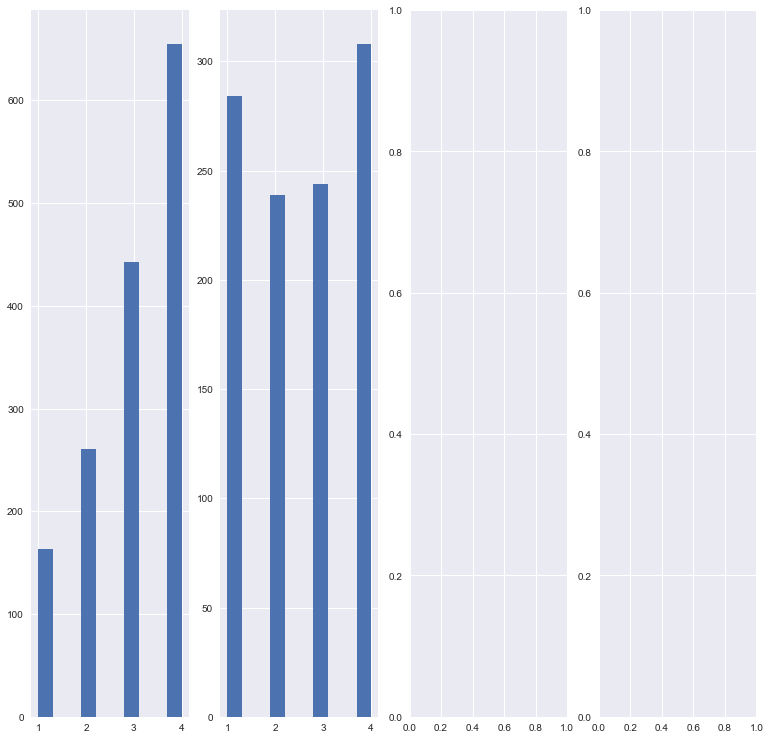

In [495]:
fig, ax = plt.subplots(nrows = 1, ncols= 4, figsize=(13,13))
ax[0].hist(df_train_1[df_train_1['respondentOrderEng']==38]['importance'])

ax[1].hist(df_train_1[df_train_1['respondentOrderEng']==47]['importance'])

In [496]:
df_test_1['respondentOrderEng'].value_counts()

38    978
47    453
48    433
35    354
20    198
37    187
49    162
8     158
9     134
29    133
42    120
4     114
43    110
23     98
18     91
40     82
26     72
5      65
19     62
15     60
16     58
33     56
24     54
45     48
3      45
32     41
7      39
17     38
46     34
1      31
11     29
28     28
6      24
31     22
10     20
44     19
36     19
34     18
14     17
13     17
21     15
22     12
39      6
25      3
27      2
2       1
Name: respondentOrderEng, dtype: int64

In [497]:
df_train_1['parties.0'].value_counts()

SAADI                                                                              16
A.                                                                                 16
H.                                                                                 15
A AND B                                                                            12
HIRST                                                                              12
                                                                                   ..
FARRUGIA                                                                            1
ALKOVIĆ                                                                             1
NEKVEDAVIČIUS                                                                       1
VITRUK                                                                              1
S.C. CARBOCHIM S.A. CLUJ-NAPOCA AND S.C. FENEGA IMPORT-EXPORT S.R.L. AND OTHERS     1
Name: parties.0, Length: 5806, dtype: int64

In [498]:
parties = []
for i in df_train_1['parties.0'].isnull():
    if i == True:
        parties.append(0)
    if i == False:
        parties.append(1)
df_train_1['parties_0'] = parties

tparties = []
for i in df_test_1['parties.0'].isnull():
    if i == True:
        tparties.append(0)
    if i == False:
        tparties.append(1)
df_test_1['parties_0'] = tparties

In [499]:
parties1 = []
for i in df_train_1['parties.1'].isnull():
    if i == True:
        parties1.append(0)
    if i == False:
        parties1.append(1)
df_train_1['parties_1'] = parties1

tparties1 = []
for i in df_test_1['parties.1'].isnull():
    if i == True:
        tparties1.append(0)
    if i == False:
        tparties1.append(1)
df_test_1['parties_1'] = tparties1

In [500]:
parties2 = []
for i in df_train_1['parties.2'].isnull():
    if i == True:
        parties2.append(0)
    if i == False:
        parties2.append(1)
df_train_1['parties_2'] = parties2

tparties2 = []
for i in df_test_1['parties.2'].isnull():
    if i == True:
        tparties2.append(0)
    if i == False:
        tparties2.append(1)
df_test_1['parties_2'] = tparties2

In [501]:
respondent = []
for i in df_train_1['respondent.0'].isnull():
    if i == True:
        respondent.append(0)
    if i == False:
        respondent.append(1)
df_train_1['respondent_0'] = respondent

trespondent = []
for i in df_test_1['respondent.0'].isnull():
    if i == True:
        trespondent.append(0)
    if i == False:
        trespondent.append(1)
df_test_1['respondent_0'] = trespondent

In [502]:
respondent1 = []
for i in df_train_1['respondent.1'].isnull():
    if i == True:
        respondent1.append(0)
    if i == False:
        respondent1.append(1)
df_train_1['respondent_1'] = respondent1

trespondent1 = []
for i in df_test_1['respondent.1'].isnull():
    if i == True:
        trespondent1.append(0)
    if i == False:
        trespondent1.append(1)
df_test_1['respondent_1'] = trespondent1

In [503]:
respondent2 = []
for i in df_train_1['respondent.2'].isnull():
    if i == True:
        respondent2.append(0)
    if i == False:
        respondent2.append(1)
df_train_1['respondent_2'] = respondent2

trespondent2 = []
for i in df_test_1['respondent.2'].isnull():
    if i == True:
        trespondent2.append(0)
    if i == False:
        trespondent2.append(1)
df_test_1['respondent_2'] = trespondent2

In [504]:
respondent3 = []
for i in df_train_1['respondent.3'].isnull():
    if i == True:
        respondent3.append(0)
    if i == False:
        respondent3.append(1)
df_train_1['respondent_3'] = respondent3

trespondent3 = []
for i in df_test_1['respondent.3'].isnull():
    if i == True:
        trespondent3.append(0)
    if i == False:
        trespondent3.append(1)
df_test_1['respondent_3'] = trespondent3

In [505]:
respondent4 = []
for i in df_train_1['respondent.4'].isnull():
    if i == True:
        respondent4.append(0)
    if i == False:
        respondent4.append(1)
df_train_1['respondent_4'] = respondent4

trespondent4 = []
for i in df_test_1['respondent.4'].isnull():
    if i == True:
        trespondent4.append(0)
    if i == False:
        trespondent4.append(1)
df_test_1['respondent_4'] = trespondent4

In [506]:
twos = ['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20']
indate = []
for i in range(0,len(df_train_1['appno'])):
    ar = df_train_1['appno'][i].split('/')
    if len(ar) == 2:
        foo_ = ar[1]
        if foo_ in twos:
            foo_ = '20'+foo_
        else:
            foo_='19'+foo_
        foo_='01'+'/'+'01'+'/'+foo_
        indate.append(foo_)
    else:
        indate.append('01'+'/'+'01'+'/'+'08')

final_intdate = []
j = 0
for i in df_train_1['introductiondate'].isnull().values:
    if i == True:
        final_intdate.append(indate[j])
    else:
        final_intdate.append(df_train_1['introductiondate'][j])
    j+=1
final_intdate        

[Timestamp('1995-01-01 00:00:00'),
 Timestamp('1994-01-01 00:00:00'),
 Timestamp('2006-01-01 00:00:00'),
 Timestamp('1997-01-01 00:00:00'),
 Timestamp('2000-01-01 00:00:00'),
 Timestamp('1999-01-01 00:00:00'),
 Timestamp('1996-01-01 00:00:00'),
 Timestamp('2011-01-01 00:00:00'),
 Timestamp('2007-01-01 00:00:00'),
 Timestamp('2002-01-01 00:00:00'),
 Timestamp('2016-01-01 00:00:00'),
 Timestamp('1992-01-01 00:00:00'),
 Timestamp('1995-01-01 00:00:00'),
 Timestamp('2013-01-01 00:00:00'),
 Timestamp('1997-01-01 00:00:00'),
 Timestamp('2015-01-01 00:00:00'),
 Timestamp('1996-01-01 00:00:00'),
 Timestamp('2009-01-01 00:00:00'),
 Timestamp('2006-01-01 00:00:00'),
 Timestamp('1998-01-01 00:00:00'),
 Timestamp('2003-01-01 00:00:00'),
 Timestamp('2017-01-01 00:00:00'),
 Timestamp('1997-01-01 00:00:00'),
 Timestamp('2012-01-01 00:00:00'),
 Timestamp('2009-01-01 00:00:00'),
 Timestamp('1996-01-01 00:00:00'),
 Timestamp('2011-01-01 00:00:00'),
 Timestamp('1996-01-01 00:00:00'),
 Timestamp('2011-01-

In [507]:
twos = ['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20']
indates = []
for i in range(0,len(df_test_1['appno'])):
    ar = df_test_1['appno'][i].split('/')
    if len(ar) == 2:
        foo_ = ar[1]
        if foo_ in twos:
            foo_ = '20'+foo_
        else:
            foo_='19'+foo_
        foo_='01'+'/'+'01'+'/'+foo_
        indates.append(foo_)
    else:
        indates.append('01'+'/'+'01'+'/'+'08')

final_intdates = []
j = 0
for i in df_test_1['introductiondate'].isnull().values:
    if i == True:
        final_intdates.append(indate[j])
    else:
        final_intdates.append(df_test_1['introductiondate'][j])
    j+=1
final_intdates       

[Timestamp('1995-01-01 00:00:00'),
 Timestamp('1994-01-01 00:00:00'),
 Timestamp('2006-01-01 00:00:00'),
 Timestamp('1997-01-01 00:00:00'),
 Timestamp('2000-01-01 00:00:00'),
 Timestamp('1999-01-01 00:00:00'),
 Timestamp('1996-01-01 00:00:00'),
 Timestamp('2011-01-01 00:00:00'),
 Timestamp('2007-01-01 00:00:00'),
 Timestamp('2002-01-01 00:00:00'),
 Timestamp('2016-01-01 00:00:00'),
 Timestamp('1992-01-01 00:00:00'),
 Timestamp('1995-01-01 00:00:00'),
 Timestamp('2013-01-01 00:00:00'),
 Timestamp('1997-01-01 00:00:00'),
 Timestamp('2015-01-01 00:00:00'),
 Timestamp('1996-01-01 00:00:00'),
 Timestamp('2009-01-01 00:00:00'),
 Timestamp('2006-01-01 00:00:00'),
 Timestamp('1998-01-01 00:00:00'),
 Timestamp('2003-01-01 00:00:00'),
 Timestamp('2017-01-01 00:00:00'),
 Timestamp('1997-01-01 00:00:00'),
 Timestamp('2012-01-01 00:00:00'),
 Timestamp('2009-01-01 00:00:00'),
 Timestamp('1996-01-01 00:00:00'),
 Timestamp('2001-06-07 00:00:00'),
 Timestamp('1996-01-01 00:00:00'),
 Timestamp('2011-01-

In [508]:
df_train_1['introductiondate'] = pd.to_datetime(final_intdate)
df_train_1['judgementdate'] = pd.to_datetime(df_train_1['judgementdate'])

In [509]:
df_test_1['introductiondate'] = pd.to_datetime(final_intdates)
df_test_1['judgementdate'] = pd.to_datetime(df_test_1['judgementdate'])

In [510]:
 df_train_1['years'] = df_train_1['judgementdate'].dt.year - df_train_1['introductiondate'].dt.year
df_train_1['years']

0         6
1         7
2        12
3         3
4         3
         ..
11995     4
11996     3
11997     4
11998     3
11999     6
Name: years, Length: 12000, dtype: int64

In [511]:
 df_test_1['years'] = df_test_1['judgementdate'].dt.year - df_test_1['introductiondate'].dt.year

In [512]:
df_train_1.loc[:,['introductiondate','judgementdate','years']]

,introductiondate,judgementdate,years
0,1995-01-01,2001-01-03,6
1,1994-01-01,2001-02-13,7
2,2006-01-01,2018-06-28,12
3,1997-01-01,2000-01-02,3
4,2000-01-01,2003-09-10,3
...,...,...,...
11995,2002-01-25,2006-09-28,4
11996,2004-01-01,2007-12-04,3
11997,2002-05-13,2006-11-16,4
11998,2011-01-01,2014-01-16,3


<BarContainer object of 9111 artists>

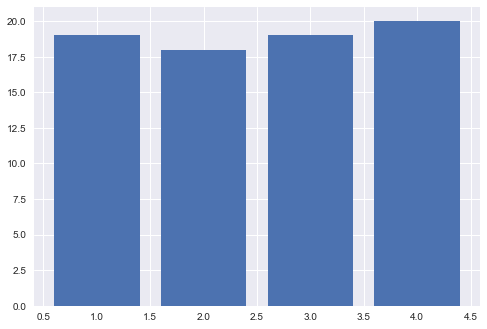

In [513]:
plt.bar(df_train_1[df_train_1['years']>=4 ]['importance'],df_train_1[df_train_1['years'] >=4 ]['years'],)

(array([  2.,   0.,  95.,   0.,   0., 247.,   0., 401.,   0.,   0., 456.,
          0.,   0., 491.,   0., 465.,   0.,   0., 343.,   0.,   0., 210.,
          0., 128.,   0.,   0.,  77.,   0.,  42.,   0.,   0.,  28.,   0.,
          0.,   9.,   0.,   4.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0.  ,  0.38,  0.76,  1.14,  1.52,  1.9 ,  2.28,  2.66,  3.04,
         3.42,  3.8 ,  4.18,  4.56,  4.94,  5.32,  5.7 ,  6.08,  6.46,
         6.84,  7.22,  7.6 ,  7.98,  8.36,  8.74,  9.12,  9.5 ,  9.88,
        10.26, 10.64, 11.02, 11.4 , 11.78, 12.16, 12.54, 12.92, 13.3 ,
        13.68, 14.06, 14.44, 14.82, 15.2 , 15.58, 15.96, 16.34, 16.72,
        17.1 , 17.48, 17.86, 18.24, 18.62, 19.  ]),
 <BarContainer object of 50 artists>)

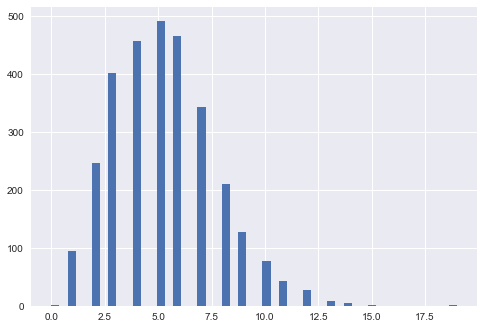

In [514]:
plt.hist(df_train_1[df_train_1['importance']==3]['years'],bins=50)

(array([  6.,   0.,  83.,   0.,   0., 176.,   0.,   0., 370.,   0.,   0.,
        647.,   0., 653.,   0.,   0., 514.,   0.,   0., 304.,   0.,   0.,
        105.,   0.,   0.,  89.,   0.,  35.,   0.,   0.,  12.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   6.]),
 array([ 0.  ,  0.36,  0.72,  1.08,  1.44,  1.8 ,  2.16,  2.52,  2.88,
         3.24,  3.6 ,  3.96,  4.32,  4.68,  5.04,  5.4 ,  5.76,  6.12,
         6.48,  6.84,  7.2 ,  7.56,  7.92,  8.28,  8.64,  9.  ,  9.36,
         9.72, 10.08, 10.44, 10.8 , 11.16, 11.52, 11.88, 12.24, 12.6 ,
        12.96, 13.32, 13.68, 14.04, 14.4 , 14.76, 15.12, 15.48, 15.84,
        16.2 , 16.56, 16.92, 17.28, 17.64, 18.  ]),
 <BarContainer object of 50 artists>)

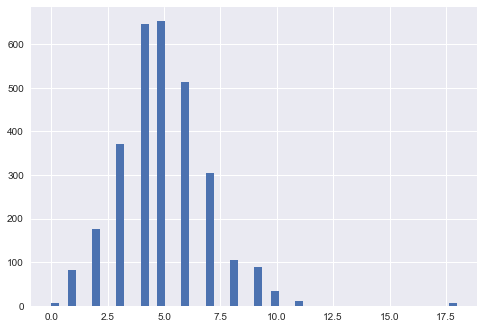

In [515]:
plt.hist(df_train_1[df_train_1['importance']==2]['years'],bins=50)

(array([ 30.,   0., 245.,   0.,   0., 491.,   0.,   0., 552.,   0.,   0.,
        671.,   0., 430.,   0.,   0., 218.,   0.,   0., 160.,   0.,   0.,
        121.,   0.,   0.,  31.,   0.,  25.,   0.,   0.,  16.,   0.,   0.,
          5.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   5.]),
 array([ 1.  ,  1.36,  1.72,  2.08,  2.44,  2.8 ,  3.16,  3.52,  3.88,
         4.24,  4.6 ,  4.96,  5.32,  5.68,  6.04,  6.4 ,  6.76,  7.12,
         7.48,  7.84,  8.2 ,  8.56,  8.92,  9.28,  9.64, 10.  , 10.36,
        10.72, 11.08, 11.44, 11.8 , 12.16, 12.52, 12.88, 13.24, 13.6 ,
        13.96, 14.32, 14.68, 15.04, 15.4 , 15.76, 16.12, 16.48, 16.84,
        17.2 , 17.56, 17.92, 18.28, 18.64, 19.  ]),
 <BarContainer object of 50 artists>)

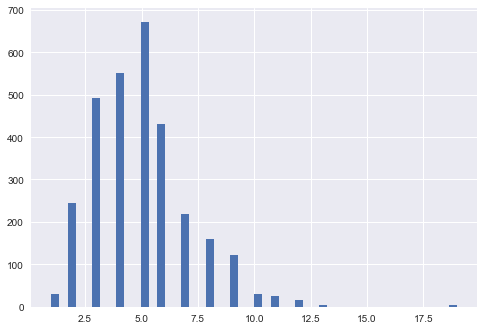

In [516]:
plt.hist(df_train_1[df_train_1['importance']==1]['years'],bins=50)

In [517]:
df_train_1['days'] = df_train_1['judgementdate'].dt.day_name()
df_test_1['days'] = df_test_1['judgementdate'].dt.day_name()

(array([182.,   0.,   0., 313.,   0.,   0., 182.,   0.,   0., 169.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

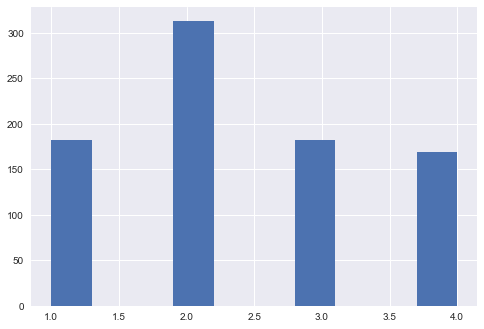

In [518]:
plt.hist(df_train_1[df_train_1['days']=='Monday']['importance'])

(array([964.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 313.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 118.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0., 845.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        276.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 378.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 106.]),
 array([0.  , 0.12, 0.24, 0.36, 0.48, 0.6 , 0.72, 0.84, 0.96, 1.08, 1.2 ,
        1.32, 1.44, 1.56, 1.68, 1.8 , 1.92, 2.04, 2.16, 2.28, 2.4 , 2.52,
        2.64, 2.76, 2.88, 3.  , 3.12, 3.24, 3.36, 3.48, 3.6 , 3.72, 3.84,
        3.96, 4.08, 4.2 , 4.32, 4.44, 4.56, 4.68, 4.8 , 4.92, 5.04, 5.16,
        5.28, 5.4 , 5.52, 5.64, 5.76, 5.88, 6.  ]),
 <BarContainer object of 50 artists>)

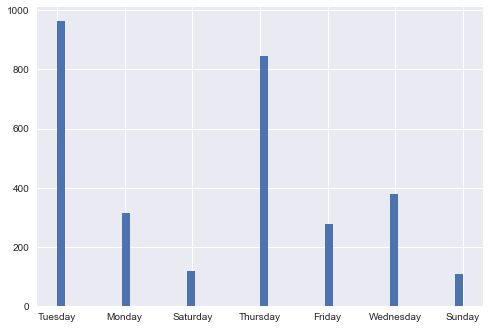

In [519]:
plt.hist(df_train_1[df_train_1['importance']== 2]['days'], bins=50)

(array([ 306.,    0.,    0.,    0.,    0.,    0.,    0.,    0., 1028.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,  961.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,  140.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,  182.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,  202.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,  181.]),
 array([0.  , 0.12, 0.24, 0.36, 0.48, 0.6 , 0.72, 0.84, 0.96, 1.08, 1.2 ,
        1.32, 1.44, 1.56, 1.68, 1.8 , 1.92, 2.04, 2.16, 2.28, 2.4 , 2.52,
        2.64, 2.76, 2.88, 3.  , 3.12, 3.24, 3.36, 3.48, 3.6 , 3.72, 3.84,
        3.96, 4.08, 4.2 , 4.32, 4.44, 4.56, 4.68, 4.8 , 4.92, 5.04, 5.16,
        5.28, 5.4 , 5.52, 5.64, 5.76, 5.88, 6.  ]),
 <BarContainer object of 50 artists>)

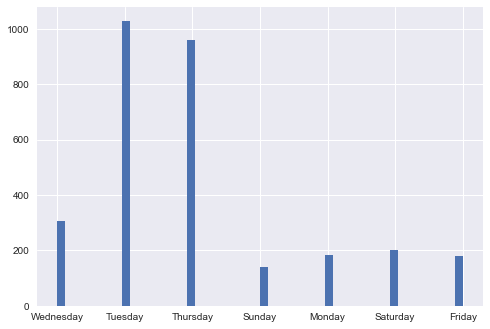

In [520]:
plt.hist(df_train_1[df_train_1['importance']== 1]['days'], bins=50)

(array([ 182.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  256.,
           0.,    0.,    0.,    0.,    0.,    0.,    0., 1134.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,  145.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,  181.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,  151.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,  951.]),
 array([0.  , 0.12, 0.24, 0.36, 0.48, 0.6 , 0.72, 0.84, 0.96, 1.08, 1.2 ,
        1.32, 1.44, 1.56, 1.68, 1.8 , 1.92, 2.04, 2.16, 2.28, 2.4 , 2.52,
        2.64, 2.76, 2.88, 3.  , 3.12, 3.24, 3.36, 3.48, 3.6 , 3.72, 3.84,
        3.96, 4.08, 4.2 , 4.32, 4.44, 4.56, 4.68, 4.8 , 4.92, 5.04, 5.16,
        5.28, 5.4 , 5.52, 5.64, 5.76, 5.88, 6.  ]),
 <BarContainer object of 50 artists>)

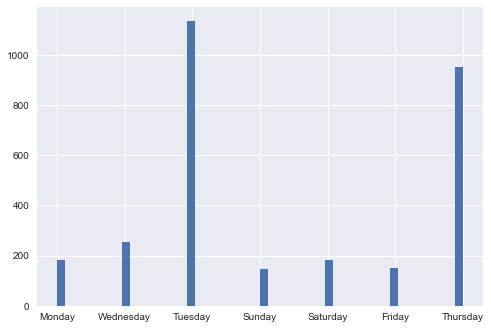

In [521]:
plt.hist(df_train_1[df_train_1['importance']== 3]['days'], bins=50)

(array([ 999.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  159.,
           0.,    0.,    0.,    0.,    0.,    0.,    0., 1153.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,  157.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,  169.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,  190.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,  173.]),
 array([0.  , 0.12, 0.24, 0.36, 0.48, 0.6 , 0.72, 0.84, 0.96, 1.08, 1.2 ,
        1.32, 1.44, 1.56, 1.68, 1.8 , 1.92, 2.04, 2.16, 2.28, 2.4 , 2.52,
        2.64, 2.76, 2.88, 3.  , 3.12, 3.24, 3.36, 3.48, 3.6 , 3.72, 3.84,
        3.96, 4.08, 4.2 , 4.32, 4.44, 4.56, 4.68, 4.8 , 4.92, 5.04, 5.16,
        5.28, 5.4 , 5.52, 5.64, 5.76, 5.88, 6.  ]),
 <BarContainer object of 50 artists>)

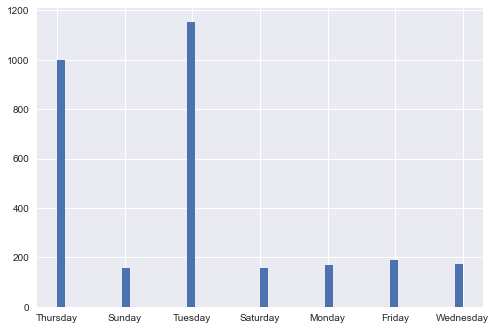

In [522]:
plt.hist(df_train_1[df_train_1['importance']== 4]['days'], bins=50)

(array([1028.,    0.,    0.,  964.,    0.,    0., 1134.,    0.,    0.,
        1153.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

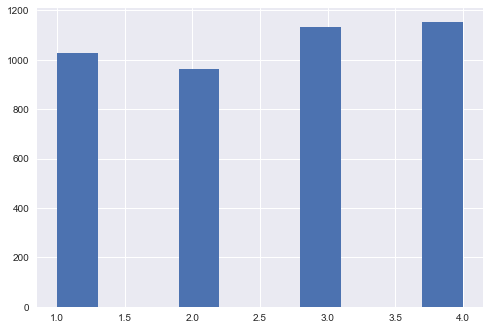

In [523]:
plt.hist(df_train_1[df_train_1['days']=='Tuesday']['importance'])

(array([306.,   0.,   0., 378.,   0.,   0., 256.,   0.,   0., 173.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

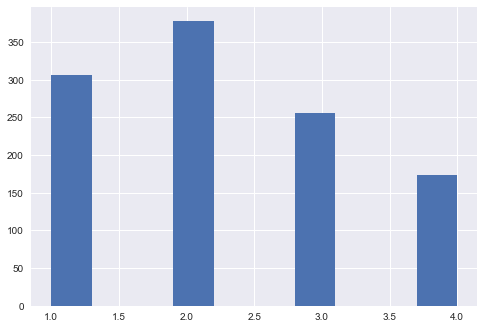

In [524]:
plt.hist(df_train_1[df_train_1['days']=='Wednesday']['importance'])

(array([961.,   0.,   0., 845.,   0.,   0., 951.,   0.,   0., 999.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

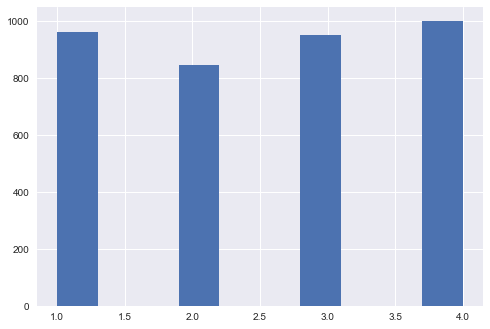

In [525]:
plt.hist(df_train_1[df_train_1['days']=='Thursday']['importance'])

(array([181.,   0.,   0., 276.,   0.,   0., 151.,   0.,   0., 190.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

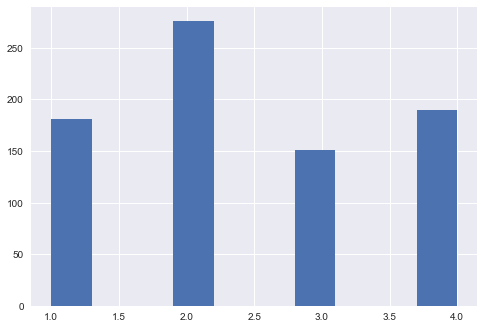

In [526]:
plt.hist(df_train_1[df_train_1['days']=='Friday']['importance'])

(array([202.,   0.,   0., 118.,   0.,   0., 181.,   0.,   0., 157.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

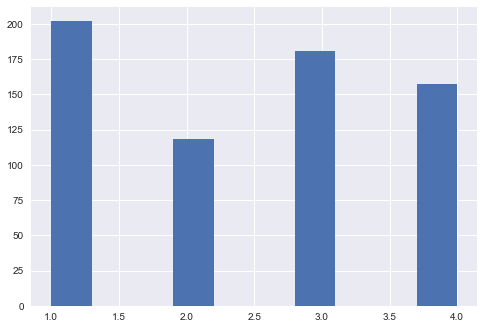

In [527]:
plt.hist(df_train_1[df_train_1['days']=='Saturday']['importance'])

(array([140.,   0.,   0., 106.,   0.,   0., 145.,   0.,   0., 159.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

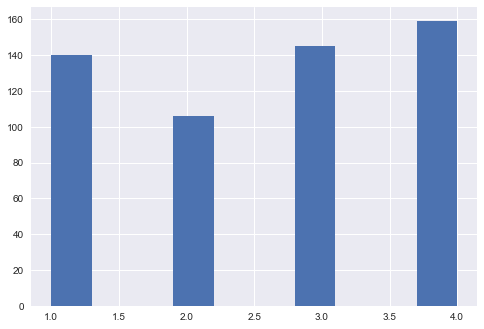

In [528]:
plt.hist(df_train_1[df_train_1['days']=='Sunday']['importance'])

In [529]:
len(df_train_1['days'])

12000

In [530]:
days_num = []
days_num_t = []
for i in df_train_1['days']:
    if i == 'Monday':
        days_num.append(1)
    if i == 'Tuesday':
        days_num.append(2)
    if i == 'Wednesday':
        days_num.append(3)
    if i == 'Thursday':
        days_num.append(4)
    if i == 'Friday':
        days_num.append(5)
    if i == 'Saturday':
        days_num.append(6)
    if i == 'Sunday':
        days_num.append(7)
print(len(days_num))
df_train_1['days_num'] = days_num

for i in df_test_1['days']:
    if i == 'Monday':
        days_num_t.append(1)
    if i == 'Tuesday':
        days_num_t.append(2)
    if i == 'Wednesday':
        days_num_t.append(3)
    if i == 'Thursday':
        days_num_t.append(4)
    if i == 'Friday':
        days_num_t.append(5)
    if i == 'Saturday':
        days_num_t.append(6)
    if i == 'Sunday':
        days_num_t.append(7)
df_test_1['days_num'] = days_num_t

12000


In [531]:
art_x = df_train_1.iloc[:,[56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102]]

In [532]:
art_xt = df_test_1.iloc[:,[56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102]]

In [533]:
arr = []
for i in art_x.columns:
    j = 0
    for k in df_train_1[i]:
        if len(arr) != 12000:
            arr.append(k)
        elif len(arr)>1200:
            arr[j] += k
            j += 1
        

In [534]:
df_train_1['total_article'] = arr

In [535]:
arry = []
for i in art_xt.columns:
    j = 0
    for k in df_test_1[i]:
        if len(arry) != 4760:
            arry.append(k)
        elif len(arry)>4760:
            arry[j] += k
            j += 1


In [536]:
df_test_1['total_article'] = arry

In [612]:
xxx['parties_0'] = df_train_1['parties_0'].values
xxx['parties_1'] = df_train_1['parties_1'].values
xxx['parties_2'] = df_train_1['parties_2'].values
xxx['respondent_0'] = df_train_1['respondent_0'].values
xxx['respondent_1'] = df_train_1['respondent_1'].values
xxx['respondent_2'] = df_train_1['respondent_2'].values
xxx['respondent_3'] = df_train_1['respondent_3'].values
xxx['respondent_4'] = df_train_1['respondent_4'].values
xxx['sharepointid'] = df_train_1['sharepointid'].values
xxx['years'] = df_train_1['years'].values
xxx['No_issues'] = df_train_1['No_of_issues'].values
xxx['days_num'] = df_train_1['days_num'].values
xxx['total_article'] = df_train_1['total_article'].values
xxx['respondentOrderEng'] = df_train_1['respondentOrderEng'].values
xxx['originatingbody'] = df_train_1['originatingbody'].values
xxx['rank'] = df_train_1['rank'].values

In [613]:
xxx

,issue_0,issue_1,issue_2,respondentOrderEng,originatingbody,rank,separateopinion,article=41,article=38,article=35,...,respondent_0,respondent_1,respondent_2,respondent_3,respondent_4,sharepointid,years,No_issues,days_num,total_article
0,1,0,0,20,5,418.651276,0,0,0,1,...,1,0,0,0,0,324412,6,1,3,2
1,1,0,0,18,4,417.721375,0,1,0,0,...,1,0,0,0,0,324357,7,1,2,2
2,1,1,1,23,8,2621.572266,1,1,0,1,...,1,0,0,0,0,476362,12,3,4,5
3,1,0,0,16,6,398.573059,1,0,0,0,...,1,0,0,0,0,438475,3,1,7,3
4,1,1,0,9,4,477.083252,0,1,0,0,...,1,0,0,0,0,318518,3,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0,0,0,38,4,565.530945,0,1,0,0,...,1,0,0,0,0,340211,4,0,4,4
11996,0,0,0,9,4,586.158508,0,0,0,0,...,1,0,0,0,0,393654,3,0,2,1
11997,1,0,0,38,4,570.566040,0,0,0,1,...,1,0,0,0,0,341562,4,1,4,3
11998,0,0,0,45,23,1094.322632,1,0,0,0,...,1,0,0,0,0,436133,3,0,4,2


In [614]:
xxy['parties_0'] = df_test_1['parties_0'].values
xxy['parties_1'] = df_test_1['parties_1'].values
xxy['parties_2'] = df_test_1['parties_2'].values
xxy['respondent_0'] = df_test_1['respondent_0'].values
xxy['respondent_1'] = df_test_1['respondent_1'].values
xxy['respondent_2'] = df_test_1['respondent_2'].values
xxy['respondent_3'] = df_test_1['respondent_3'].values
xxy['respondent_4'] = df_test_1['respondent_4'].values
xxy['sharepointid'] = df_test_1['sharepointid'].values
xxy['years'] = df_test_1['years']
xxy['No_issues'] = df_test_1['No_of_issues']
xxy['days_num'] = df_test_1['days_num']
xxy['total_article'] = df_test_1['total_article']
xxy['respondentOrderEng'] = df_test_1['respondentOrderEng'].values
xxy['originatingbody'] = df_test_1['originatingbody'].values
xxy['rank'] = df_test_1['rank'].values
xxy

,issue_0,issue_1,issue_2,respondentOrderEng,originatingbody,rank,separateopinion,article=41,article=38,article=35,...,respondent_0,respondent_1,respondent_2,respondent_3,respondent_4,sharepointid,years,No_issues,days_num,total_article
0,0,0,0,33,29,794.766724,0,0,0,0,...,1,0,0,0,0,359124,16,0,4,0
1,0,0,0,48,23,1448.891235,0,0,0,0,...,1,0,0,0,0,435683,21,0,4,1
2,0,0,0,22,29,868.238831,0,0,0,0,...,1,0,0,0,0,357179,6,0,4,0
3,1,0,0,38,4,1024.145508,0,1,0,1,...,1,0,0,0,0,430113,16,1,7,0
4,1,0,0,38,4,672.862183,0,1,0,0,...,1,0,0,0,0,352583,9,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4755,0,0,0,38,27,1678.799805,0,0,0,0,...,1,0,0,0,0,455125,32,0,2,0
4756,0,0,0,43,29,1161.929688,0,0,0,0,...,1,0,0,0,0,388701,12,0,5,0
4757,0,0,0,37,6,892.368225,0,0,0,0,...,1,0,0,0,0,370388,11,0,2,0
4758,0,0,0,19,25,2646.512939,0,0,0,0,...,1,0,0,0,0,476724,32,0,5,1


In [615]:
xxy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4760 entries, 0 to 4759
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   issue_0             4760 non-null   int64  
 1   issue_1             4760 non-null   int64  
 2   issue_2             4760 non-null   int64  
 3   respondentOrderEng  4760 non-null   int64  
 4   originatingbody     4760 non-null   int64  
 5   rank                4760 non-null   float64
 6   separateopinion     4760 non-null   int64  
 7   article=41          4760 non-null   int64  
 8   article=38          4760 non-null   int64  
 9   article=35          4760 non-null   int64  
 10  article=46          4760 non-null   int64  
 11  paragraphs=6        4760 non-null   int64  
 12  paragraphs=6-1      4760 non-null   int64  
 13  paragraphs=8-1      4760 non-null   int64  
 14  paragraphs=10       4760 non-null   int64  
 15  paragraphs=8-2      4760 non-null   int64  
 16  paragr

## SAVE DATA SETS IN LOCAL MACHINE

In [893]:
third_time_x = pd.read_csv('final_train_data1.csv', low_memory=False)
third_time_y = pd.read_csv('final_test_data1.csv', low_memory=False)

In [896]:
third_time_x.columns[288:313]

Index(['ccl_article=1', 'ccl_article=10', 'ccl_article=11', 'ccl_article=12',
       'ccl_article=13', 'ccl_article=14', 'ccl_article=17', 'ccl_article=18',
       'ccl_article=2', 'ccl_article=25', 'ccl_article=3', 'ccl_article=34',
       'ccl_article=38', 'ccl_article=4', 'ccl_article=46', 'ccl_article=5',
       'ccl_article=6', 'ccl_article=7', 'ccl_article=8', 'ccl_article=9',
       'ccl_article=p1', 'ccl_article=p12', 'ccl_article=p4', 'ccl_article=p6',
       'ccl_article=p7'],
      dtype='object')

In [897]:
col = {1:1,0:0,-1:1}
foo_12 = ['ccl_article=1', 'ccl_article=10', 'ccl_article=11', 'ccl_article=12',
       'ccl_article=13', 'ccl_article=14', 'ccl_article=17', 'ccl_article=18',
       'ccl_article=2', 'ccl_article=25', 'ccl_article=3', 'ccl_article=34',
       'ccl_article=38', 'ccl_article=4', 'ccl_article=46', 'ccl_article=5',
       'ccl_article=6', 'ccl_article=7', 'ccl_article=8', 'ccl_article=9',
       'ccl_article=p1', 'ccl_article=p12', 'ccl_article=p4', 'ccl_article=p6',
       'ccl_article=p7']
for i in foo_12:
    third_time_x[i] = third_time_x[i].map(col)
    third_time_y[i] = third_time_x[i].map(col)

In [976]:
third_time_x['originatingbody'].value_counts()

4     2242
7     1901
5     1647
8     1393
6     1344
23    1145
9     1081
15     332
27     293
29     215
28     195
26     122
25      90
Name: originatingbody, dtype: int64

## USE RECURSIVE METHOD FOR THIRD ATTEMPT

In [1080]:
x_trains, x_tests, y_trains, y_tests  = train_test_split(third_time_x,feature_sel_label, test_size=0.2, random_state=42)

In [1081]:
columns = []

In [1082]:
from xgboost.sklearn import XGBClassifier
final_xg = XGBClassifier(objective='multi:softmax',max_depth=4, learning_rate=1.0, n_estimators=164)
final_xg.fit(x_trains.iloc[:,[0,1,2,3,4,5,6,7,9,11,13,14,15,17,25,37,38,40,46,56,58,205,239]],y_trains)
print(final_xg.score(x_trains.iloc[:,[0,1,2,3,4,5,6,7,9,11,13,14,15,17,25,37,38,40,46,56,58,205,239]],y_trains))
pred_xgb = final_xg.predict(x_tests.iloc[:,[0,1,2,3,4,5,6,7,9,11,13,14,15,17,25,37,38,40,46,56,58,205,239]])
colunms.append(accuracy_score(y_tests, pred_xgb))
colunms[len(colunms)-1]

1.0


0.97625

In [604]:
0.97375

0.9725

# FINAL DATASET

In [1083]:
temp_x = third_time_x.iloc[:,[0,1,2,3,4,5,6,7,9,11,13,14,15,17,25,37,38,40,46,56,58,205,239]]
temp_y = third_time_y.iloc[:,[0,1,2,3,4,5,6,7,9,11,13,14,15,17,25,37,38,40,46,56,58,205,239]]

In [1084]:
temp_y

,issue_0,issue_1,issue_2,respondentOrderEng,originatingbody,rank,separateopinion,article=41,article=35,paragraphs=6,...,paragraphs=9-2,td14,sharepointid,years,days_num,article=8,article=14,article=9,paragraphs=P4-2-2,paragraphs=46-1
0,0,0,0,33,29,794.766724,0,0,0,1,...,0,0,359124,16,4,0,0,0,0,0
1,0,0,0,48,23,1448.891235,0,0,0,0,...,0,0,435683,21,4,0,0,0,0,0
2,0,0,0,22,29,868.238831,0,0,0,1,...,0,0,357179,6,4,0,0,0,0,0
3,1,0,0,38,4,1024.145508,0,1,1,0,...,0,0,430113,16,7,0,0,0,0,0
4,1,0,0,38,4,672.862183,0,1,0,0,...,0,0,352583,9,4,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4755,0,0,0,38,27,1678.799805,0,0,0,0,...,0,0,455125,32,2,0,0,0,0,0
4756,0,0,0,43,29,1161.929688,0,0,0,1,...,0,0,388701,12,5,0,0,0,0,0
4757,0,0,0,37,6,892.368225,0,0,0,0,...,0,0,370388,11,2,1,0,0,0,0
4758,0,0,0,19,25,2646.512939,0,0,0,0,...,0,0,476724,32,5,0,0,0,0,0


In [1085]:
temp_x

,issue_0,issue_1,issue_2,respondentOrderEng,originatingbody,rank,separateopinion,article=41,article=35,paragraphs=6,...,paragraphs=9-2,td14,sharepointid,years,days_num,article=8,article=14,article=9,paragraphs=P4-2-2,paragraphs=46-1
0,1,0,0,20,5,418.651276,0,0,1,1,...,0,1,324412,6,3,0,0,0,0,0
1,1,0,0,18,4,417.721375,0,1,0,0,...,0,0,324357,7,2,0,0,0,0,0
2,1,1,1,23,8,2621.572266,1,1,1,1,...,0,1,476362,12,4,0,0,0,0,0
3,1,0,0,16,6,398.573059,1,0,0,0,...,0,0,438475,3,7,1,1,0,0,0
4,1,1,0,9,4,477.083252,0,1,0,1,...,0,0,318518,3,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0,0,0,38,4,565.530945,0,1,0,1,...,0,0,340211,4,4,0,0,0,0,0
11996,0,0,0,9,4,586.158508,0,0,0,1,...,0,0,393654,3,2,0,0,0,0,0
11997,1,0,0,38,4,570.566040,0,0,1,1,...,0,1,341562,4,4,0,0,0,0,0
11998,0,0,0,45,23,1094.322632,1,0,0,0,...,0,0,436133,3,4,0,0,0,0,0


## SPILT TRAIN AND VALIDATION DATA

In [1098]:
x_trains, x_tests, y_trains, y_tests  = train_test_split(temp_x,feature_sel_label, test_size=0.2, random_state=42)

## XGBOOST

In [1099]:
from xgboost.sklearn import XGBClassifier
xg = XGBClassifier(objective='multi:softmax',max_depth=4, learning_rate=1.0, n_estimators=164)
xg.fit(x_trains,y_trains)
print(xg.score(x_trains,y_trains))
pred_xg = xg.predict(x_tests)
print(classification_report(y_tests, pred_xg))
print(confusion_matrix(y_tests, pred_xg))
print(accuracy_score(y_tests, pred_xg))

1.0
              precision    recall  f1-score   support

           1       0.98      1.00      0.99       612
           2       0.97      1.00      0.99       624
           3       0.97      0.94      0.95       568
           4       0.98      0.96      0.97       596

    accuracy                           0.98      2400
   macro avg       0.98      0.98      0.98      2400
weighted avg       0.98      0.98      0.98      2400

[[612   0   0   0]
 [  0 624   0   0]
 [  8  17 533  10]
 [  4   2  16 574]]
0.97625


## USE CROSS VALIDATION

In [1100]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(xg, x_trains,y_trains, cv=5, scoring='f1_macro')
print(score.mean())
print(score.std())

0.9568877266858488
0.0034754875363175518


# PREDICT TEST DATASET

In [ ]:
predict_xg= xg.predict(temp_y)

In [962]:
final_data = pd.DataFrame({'appno':df_test_1['appno'], 'importance':predict_xg})

In [963]:
final_data['importance'].value_counts()

4    3076
3    1140
1     284
2     260
Name: importance, dtype: int64

In [964]:
final_data.to_csv('submission_xg_14.csv', index=False)

IN FINAL ATTEMPT I GOT 87.52% ACCURACY